In [23]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from skimage import data, color, feature
import os

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Szimpla éldetekció:

In [25]:
def simple_edge_detection(image, treshold_1, treshold_2): 
   image = np.uint8(image)
   gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
   edges_detected = cv2.Canny(gray_image , treshold_1, treshold_2) 
   images = [image , edges_detected]
   return images

Egy teszt kép betöltése, majd éldetekció meghívása arra

In [26]:
image = cv2.imread('/content/drive/MyDrive/278173483_312744650986164_2539427315692127476_n.jpg')
#plt.imshow(image)
images = simple_edge_detection(image, 150, 250)

In [19]:
images[1].shape

(1334, 750)

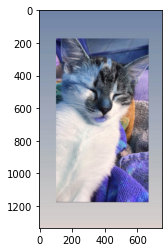

In [22]:
plt.imshow(images[0], cmap="gray")

Eredeti és eldetektált kép kimutatása

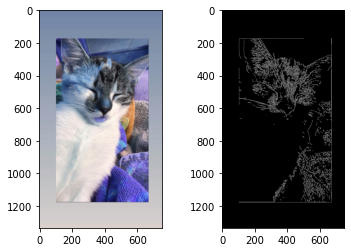

In [20]:
location = [121, 122] 
for loc, edge_image in zip(location, images): 
   plt.subplot(loc)
   plt.imshow(edge_image, cmap='gray')

Most töltsük be a seeger gyűrűk képeit:

Mountoljuk a driveot

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
path = '/content/drive/MyDrive/new_test'

Csináljunk egy listát a képekből

In [29]:
#appending the pics to the training data list
training_data = []
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    # pic = cv2.resize(pic,(80,80))
    training_data.append(pic)

In [ ]:
f"{len(training_data)} kép van a test halmazban."

'15 kép van a test halmazban.'

Képek levágása:

In [30]:
def crop_images(images,x1,x2,y1,y2):
    #200:400,300:600
  return [img[x1:x2,y1:y2] for img in images]

In [31]:
cropped_training_data = crop_images(training_data,200,400,300,600)

In [32]:
cropped_training_data[0].shape

(200, 300, 3)

Képek megjelenítése:

In [33]:
def plot_images(images):
  fig, ax = plt.subplots(3, 5, figsize=(32, 16))
  for i, axi in enumerate(ax.flat):
      axi.imshow(images[i], cmap='gray')
      axi.axis('off')

In [ ]:
#plot_images(training_data)

Nézzük meg a levágottakat is:

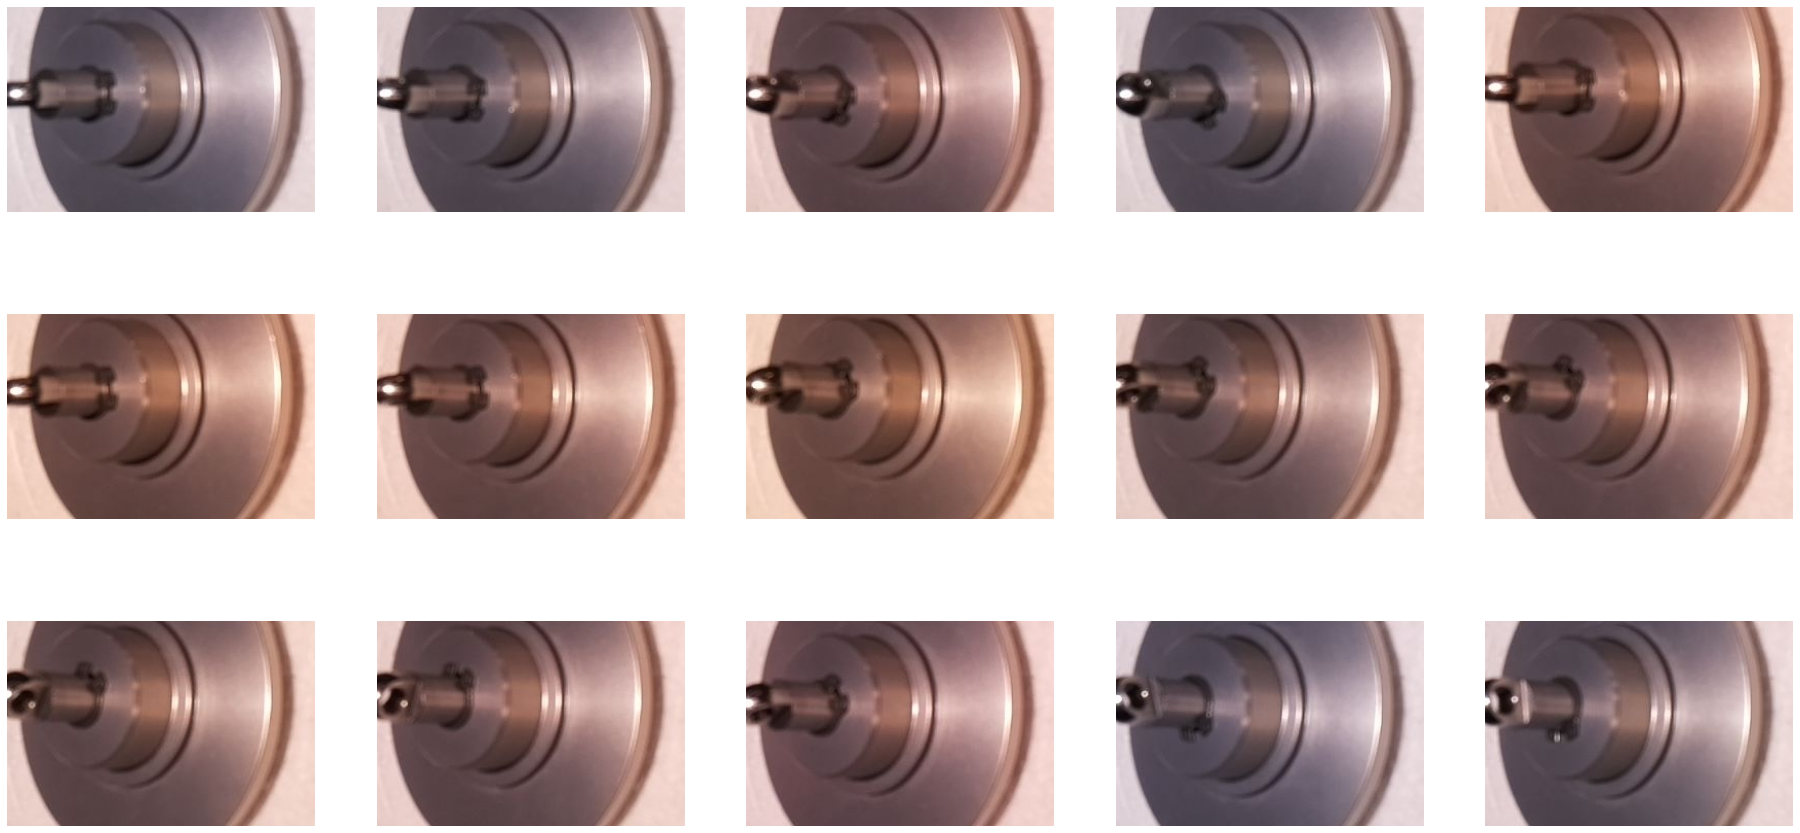

In [34]:
plot_images(cropped_training_data)

<h2>Edge detection with Canny, 100 and 200 treshold values<h2>

Csináljunk egy listát amibe az éldetektált képeket rakjuk:

In [ ]:
training_edges =  [simple_edge_detection(img, 100, 200)[1] for img in training_data]

In [ ]:
cropped_training_edges = [simple_edge_detection(img, 100, 200)[1] for img in cropped_training_data]

In [ ]:
#plot_images(training_edges)

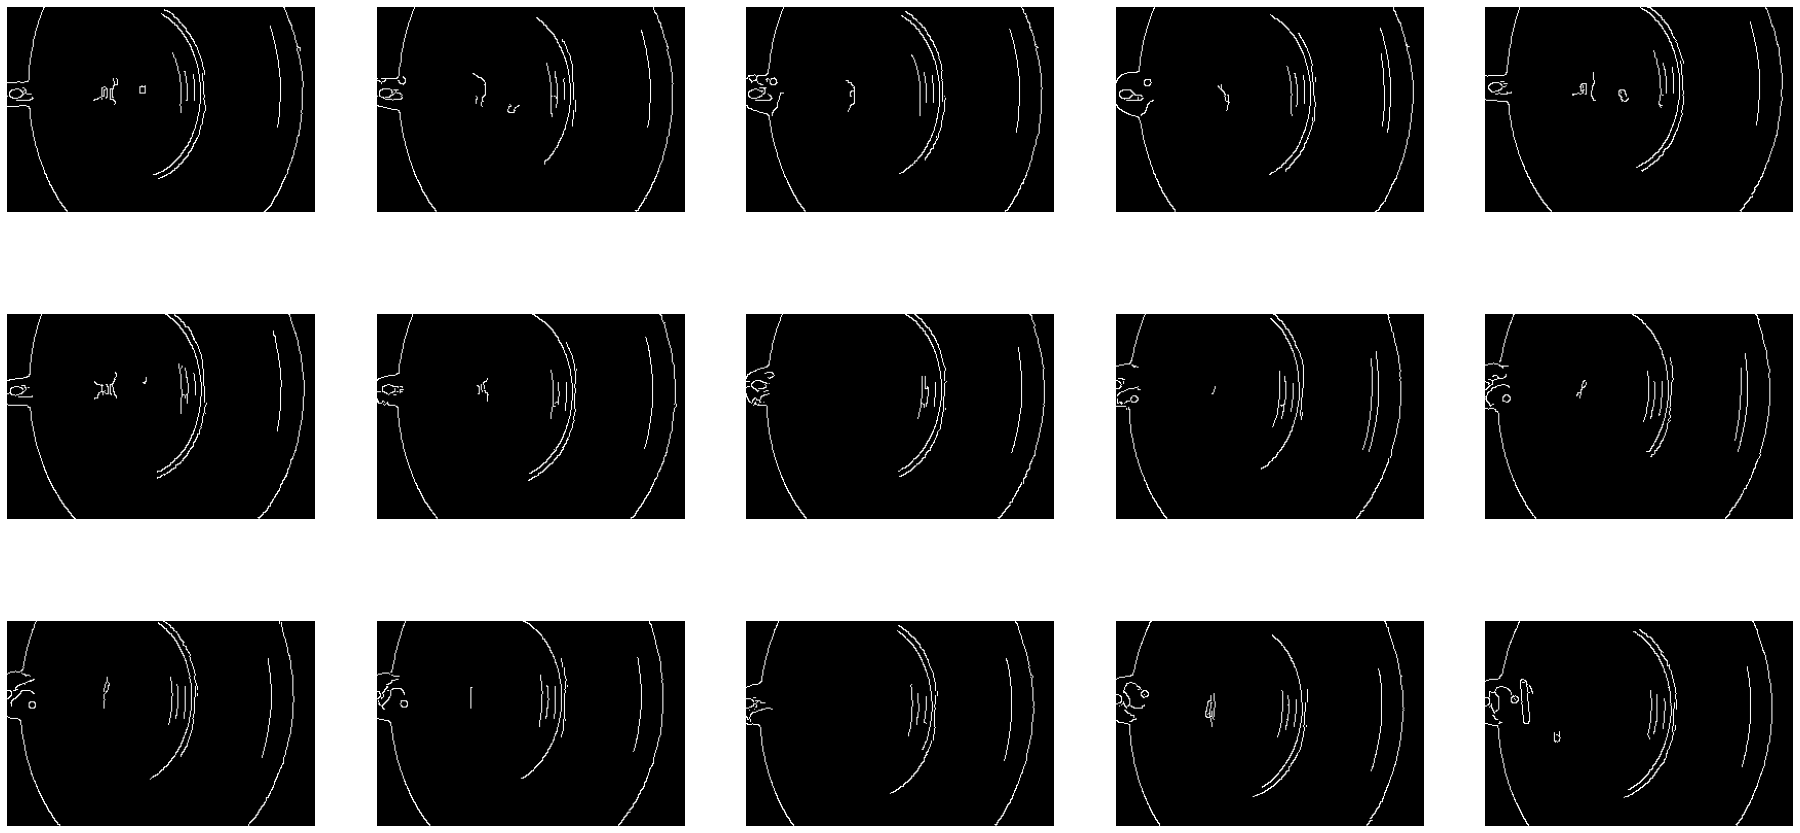

In [ ]:
plot_images(cropped_training_edges)

<h2>Edge detection with Canny, 50 and 100 treshold values<h2>

In [ ]:
cropped_training_edges_2 = [simple_edge_detection(img, 50, 100)[1] for img in cropped_training_data]

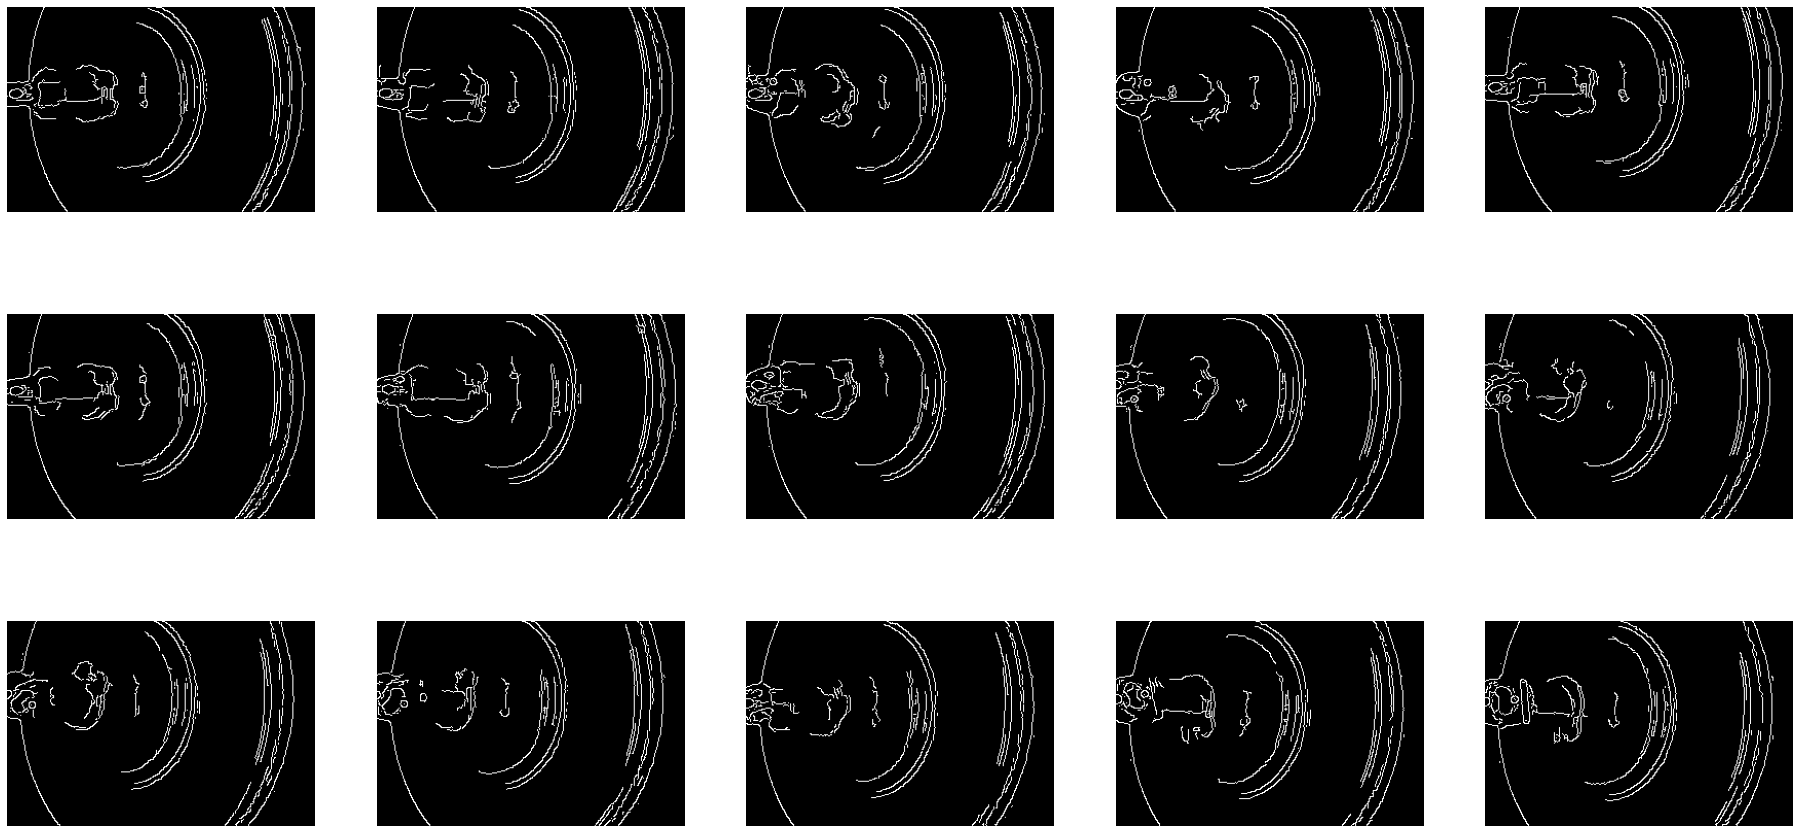

In [ ]:
plot_images(cropped_training_edges_2)

<h2>Edge detection with Canny, 300 and 400 treshold values<h2>

In [ ]:
cropped_training_edges_3 = [simple_edge_detection(img, 300, 400)[1] for img in cropped_training_data]

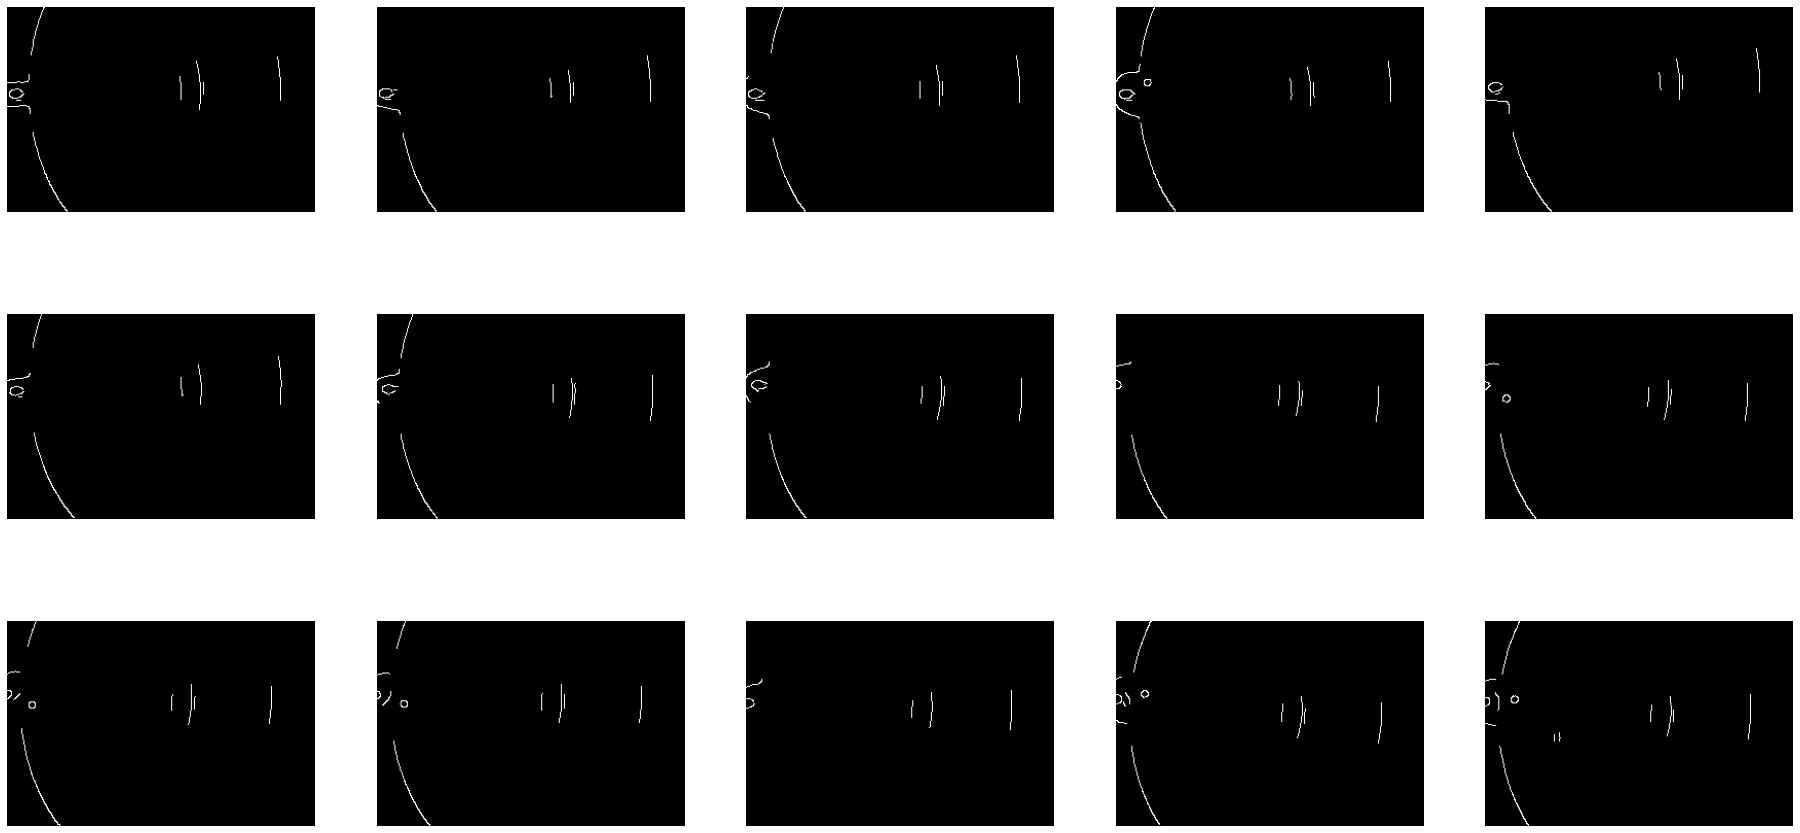

In [ ]:
plot_images(cropped_training_edges_3)

<h2>Edge detection with PIL FIND EDGES<h2>

In [ ]:
from PIL import Image, ImageFilter

In [ ]:
path

'/content/drive/MyDrive/new_test'

In [ ]:
pil_training_data = []
for img in os.listdir(path):
    pic = Image.open(os.path.join(path,img))
    width, height = pic.size
    left = 340
    top = 140
    right = 650
    bottom = 440
    pic = pic.crop((left,top,right,bottom))
    pil_training_data.append(pic)

In [ ]:
#plot_images(pil_training_data)

In [ ]:
gray_training_data = [img.convert("L") for img in pil_training_data]

In [ ]:
filtered_training_data = [img.filter(ImageFilter.FIND_EDGES) for img in gray_training_data]

In [ ]:
len(pil_training_data)

15

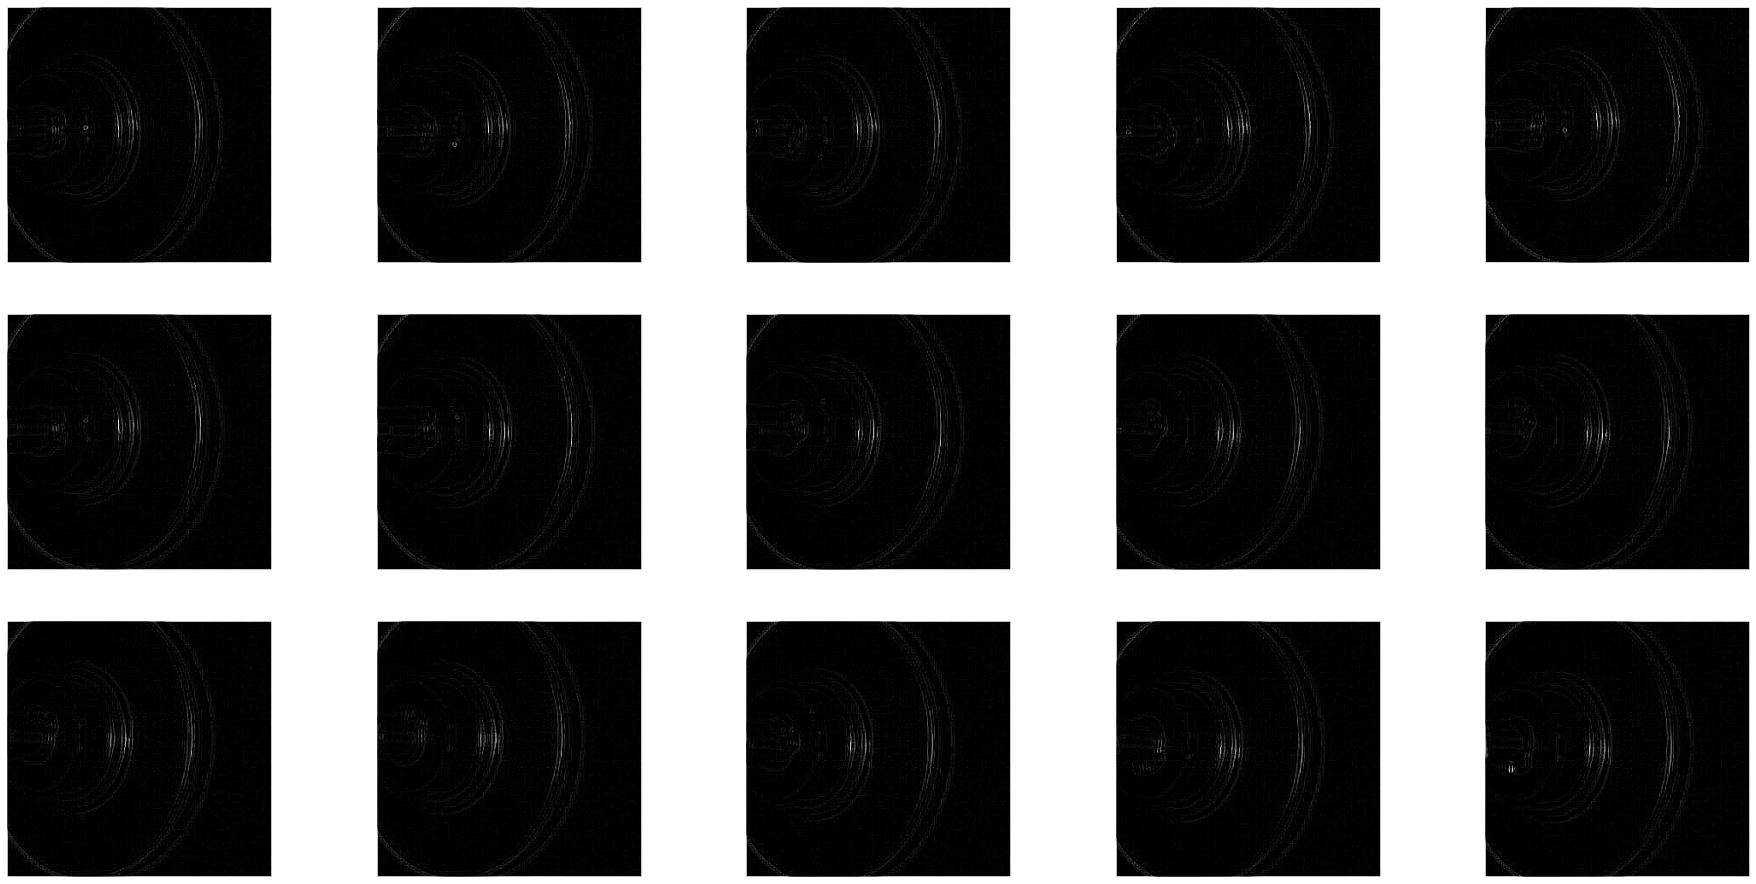

In [ ]:
plot_images(filtered_training_data)

In [ ]:
filtered_training_data_2 = [img.filter(ImageFilter.Kernel((3, 3), (-1, -1, -1, -1, 8,-1, -1, -1, -1), 1, 0)) for img in gray_training_data]

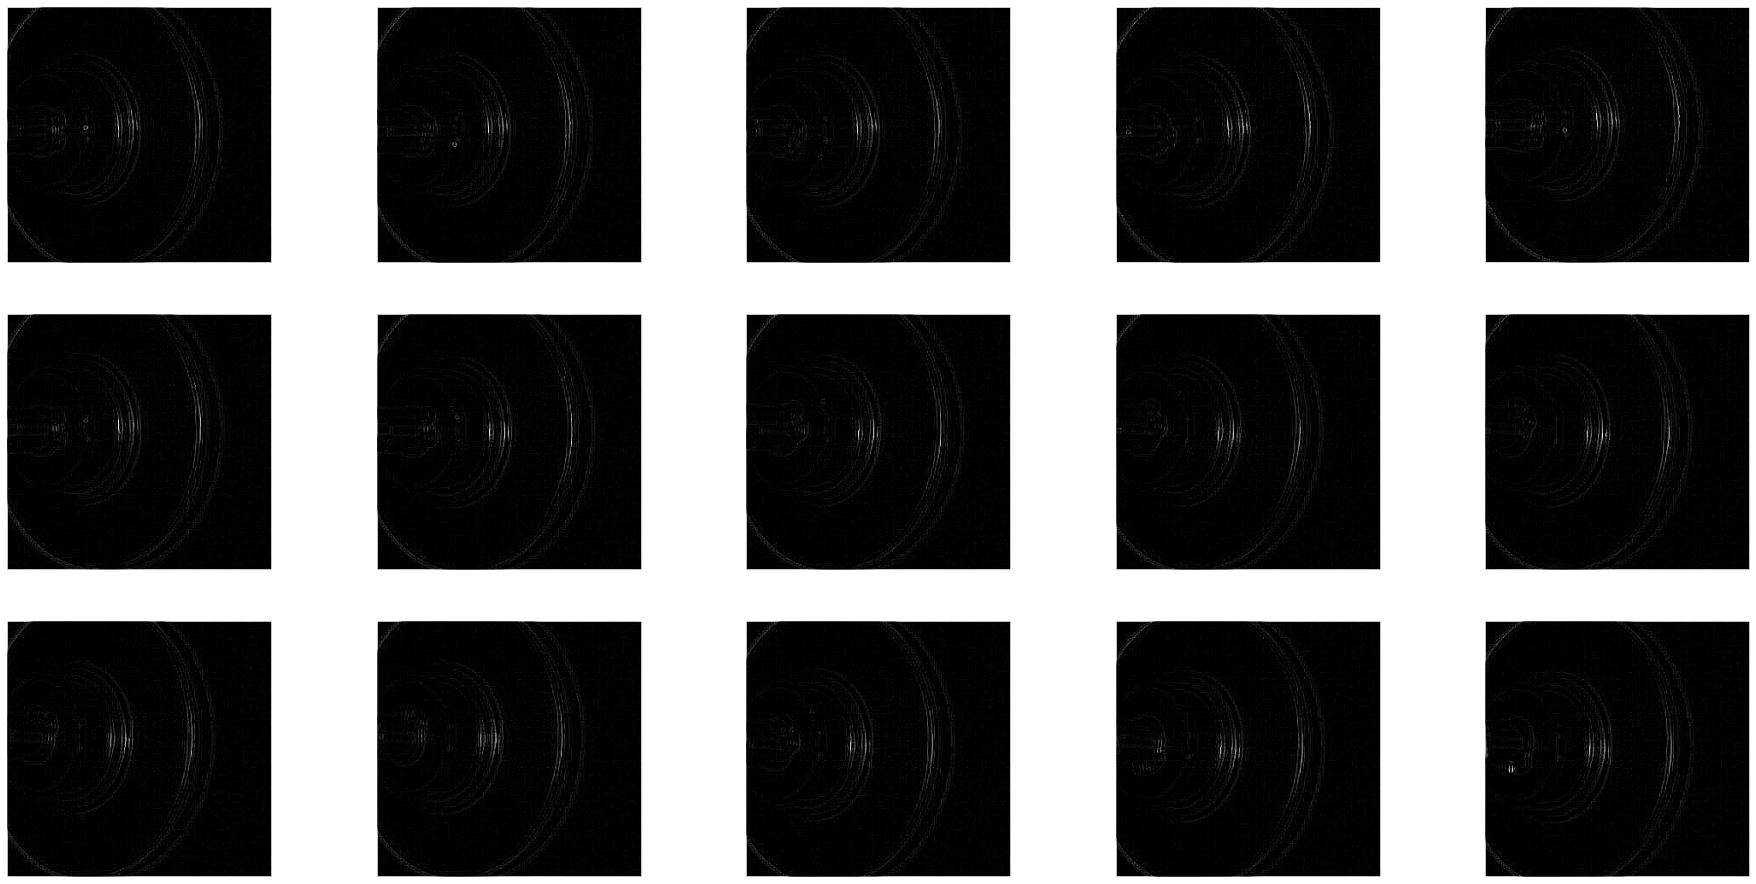

In [ ]:
plot_images(filtered_training_data_2)

Használjunk openinget, majd utána detektáljunk:

In [ ]:
def apply_opening(images):
  opened_images = [cv2.morphologyEx(img, cv2.MORPH_OPEN, se_cv2) for img in images]
  return opened_images

In [ ]:
def apply_closing(images):
  opened_images = [cv2.morphologyEx(img, cv2.MORPH_CLOSE, se_cv2) for img in images]
  return opened_images

In [ ]:
def apply_edge_detection(images):
  edge_detected_images = [simple_edge_detection(img, 100, 200)[1] for img in images]
  return edge_detected_images

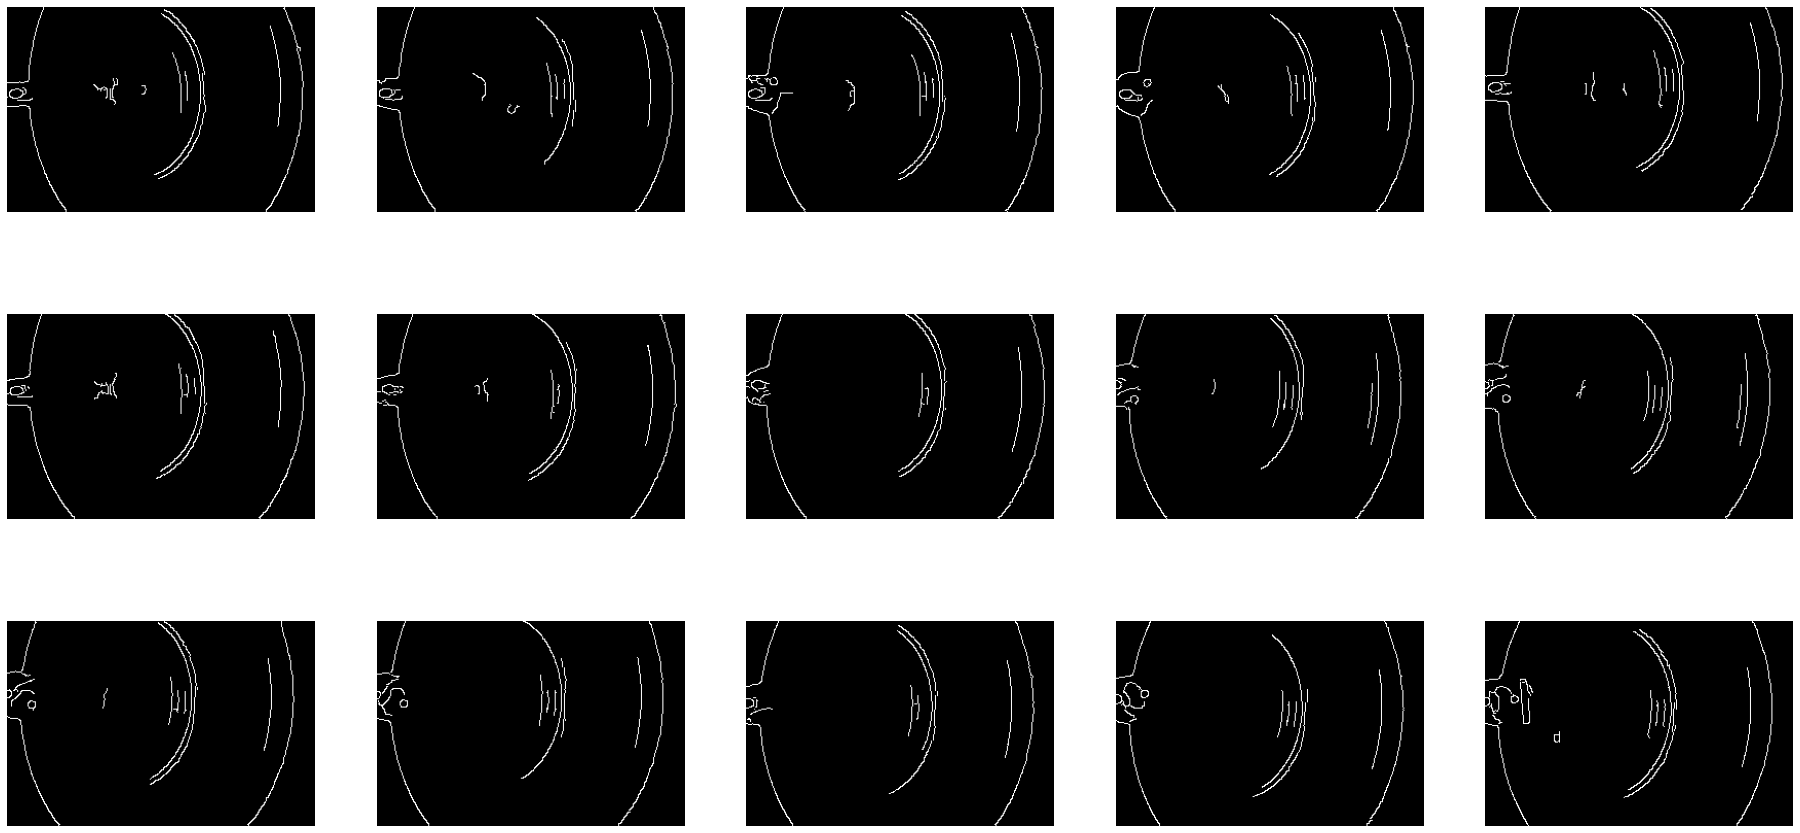

In [ ]:
se_cv2 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

opening_images = apply_opening(cropped_training_data)
opening_images_edges = apply_edge_detection(opening_images)

plot_images(opening_images_edges)

<h2>A képek kontrasztjának és fényességének állításával próbálunk javítani:<h2>

In [ ]:
import cv2
from matplotlib import pyplot as plt
import argparse
import math

def apply_bilateral(image):
    return cv2.bilateralFilter(image, 22, 180, 280)

def apply_gaussian(images):
    blured_images = [cv2.GaussianBlur(img, (15, 15), 0) for img in images]
    return blured_images

# Automatic brightness and contrast optimization with optional histogram clipping
def automatic_brightness_and_contrast(image, clip_hist_percent):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Calculate grayscale histogram
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    hist_size = len(hist)
    
    # Calculate cumulative distribution from the histogram
    accumulator = []
    accumulator.append(float(hist[0]))
    for index in range(1, hist_size):
        accumulator.append(accumulator[index -1] + float(hist[index]))
    
    # Locate points to clip
    maximum = accumulator[-1]
    clip_hist_percent *= (maximum/100.0)
    clip_hist_percent /= 2.0
    
    # Locate left cut
    minimum_gray = 0
    while accumulator[minimum_gray] < clip_hist_percent:
        minimum_gray += 1
    
    # Locate right cut
    maximum_gray = hist_size -1
    while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
        maximum_gray -= 1
    
    # Calculate alpha and beta values
    alpha = 255 / (maximum_gray - minimum_gray)
    beta = -minimum_gray * alpha
    

    auto_result = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return (auto_result, alpha, beta)

In [ ]:
def apply_auto_brightness_and_contrast(images, param):
  new_images = [automatic_brightness_and_contrast(img, param)[0] for img in images]
  return new_images

Alkalmazzuk a gaussianBlur-t majd állítsuk be a contrastot és broghtness-t

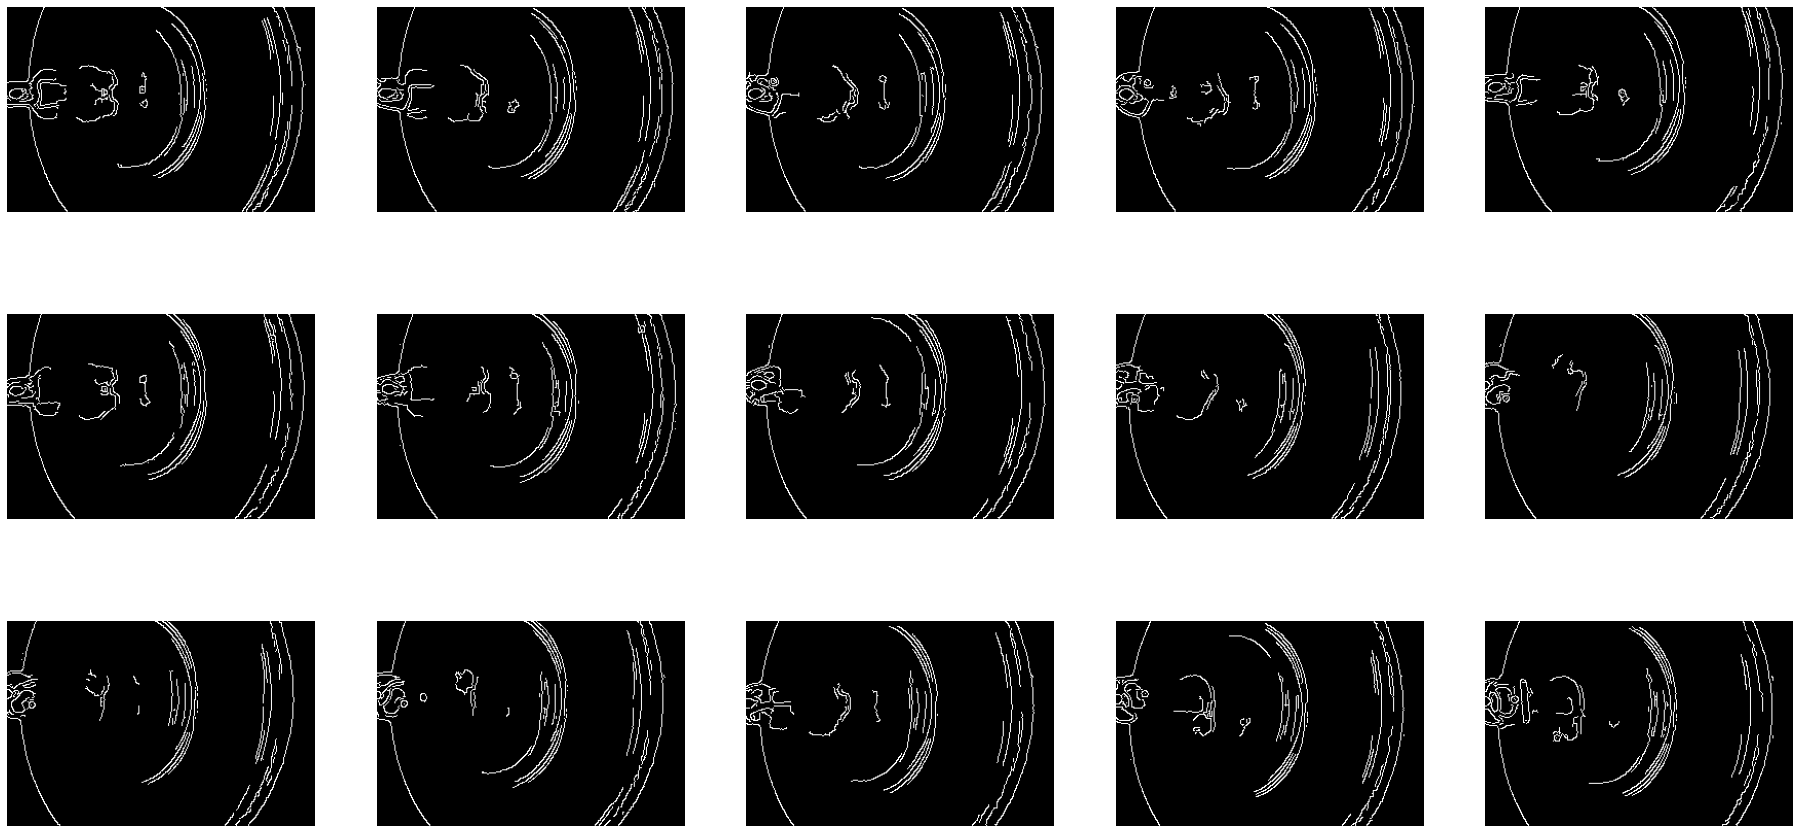

In [ ]:
# blur_cropped_training_data = apply_gaussian(cropped_training_data)
automatic_brightness_and_contrast_data = apply_auto_brightness_and_contrast(cropped_training_data, 25)
automatic_brightness_and_contrast_data_edge = apply_edge_detection(automatic_brightness_and_contrast_data)

#plot
plot_images(automatic_brightness_and_contrast_data_edge)

<h2>Jelenítsük meg páronként a képeket (sima edge detection result, contrasztos edge detection result):<h2>

In [ ]:
def plot_in_pair(images1,images2):
  for i in range(15):
    fig, ax = plt.subplots(1, 2, figsize=(16, 8),subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow(images1[i])
    ax[1].imshow(images2[i]);

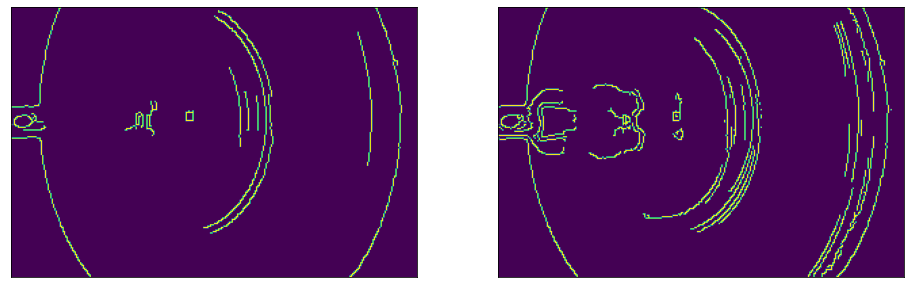

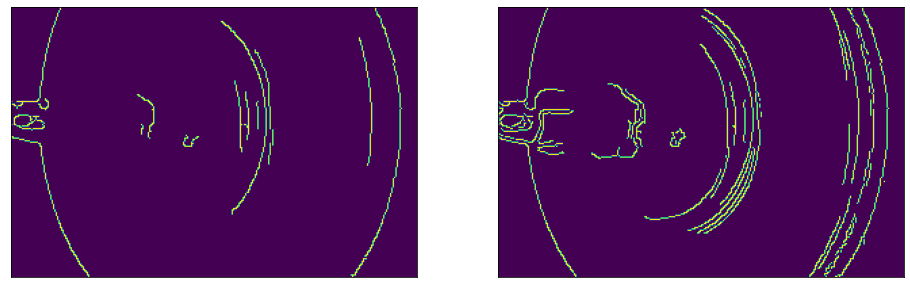

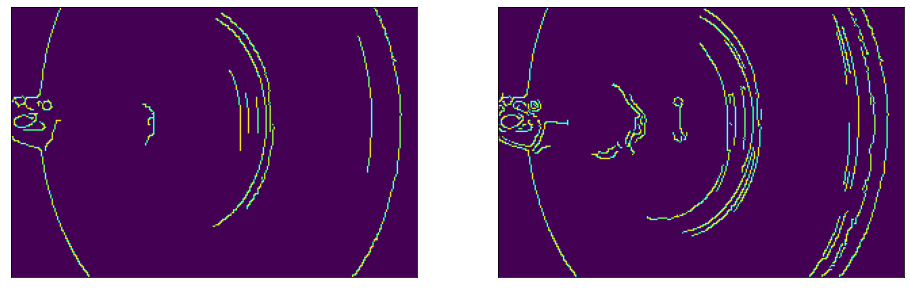

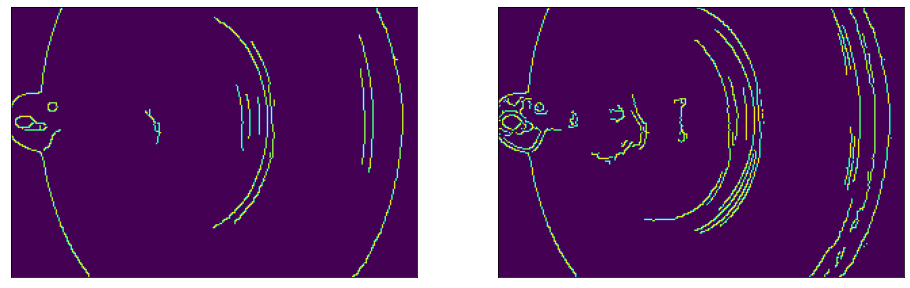

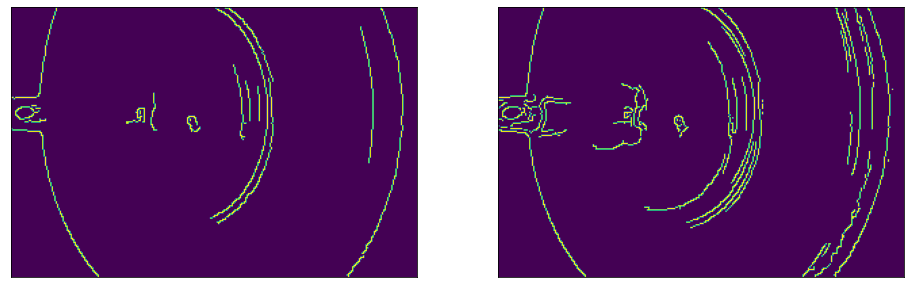

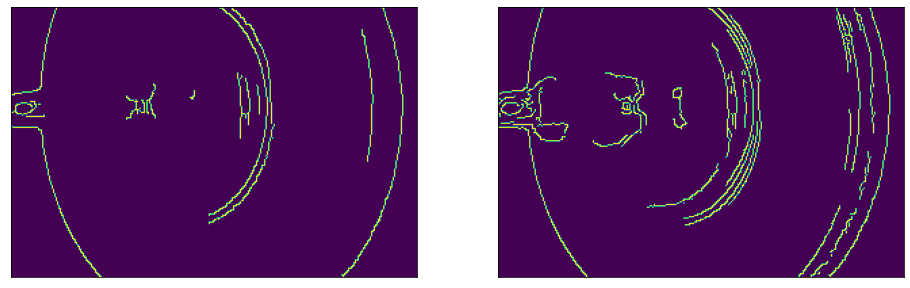

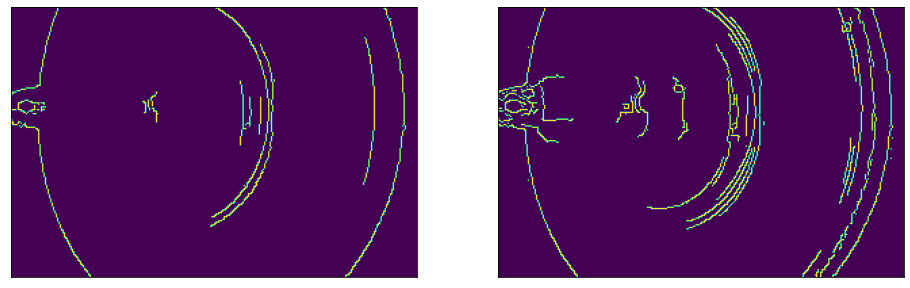

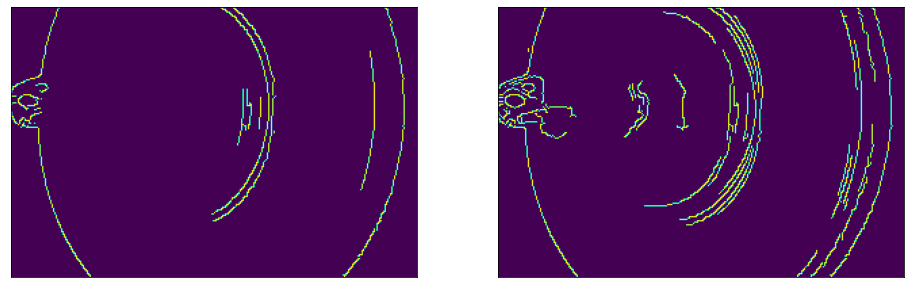

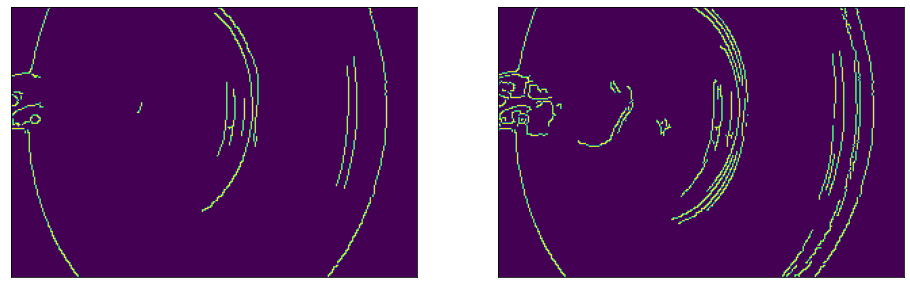

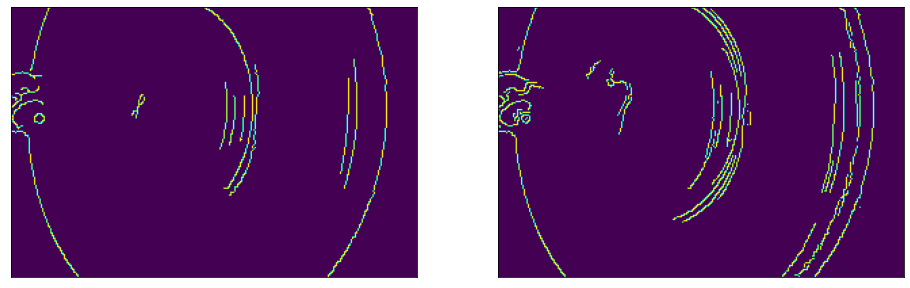

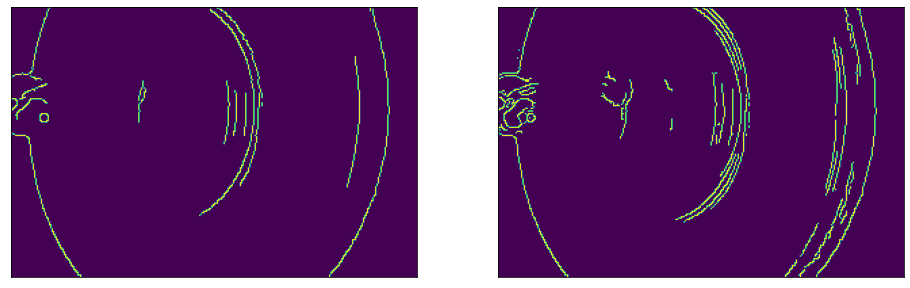

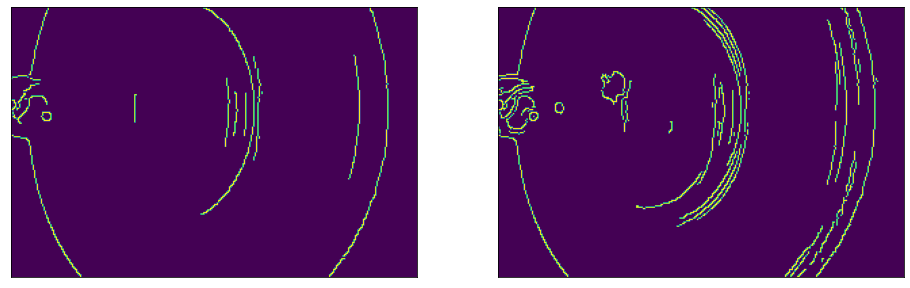

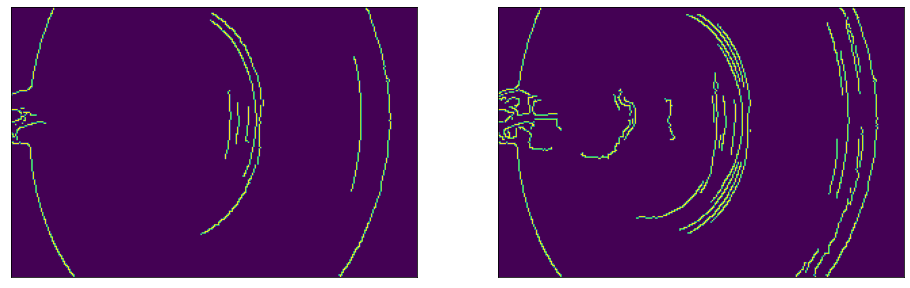

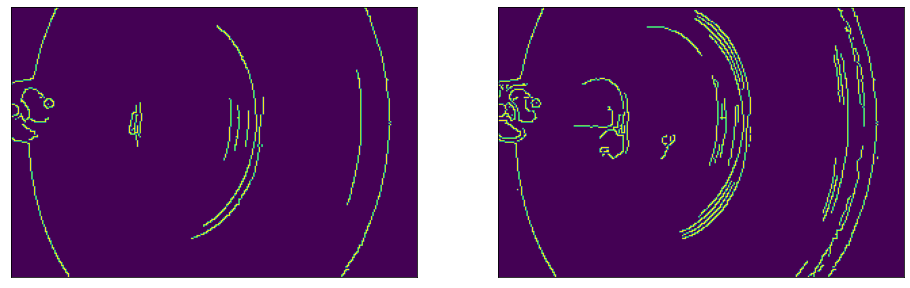

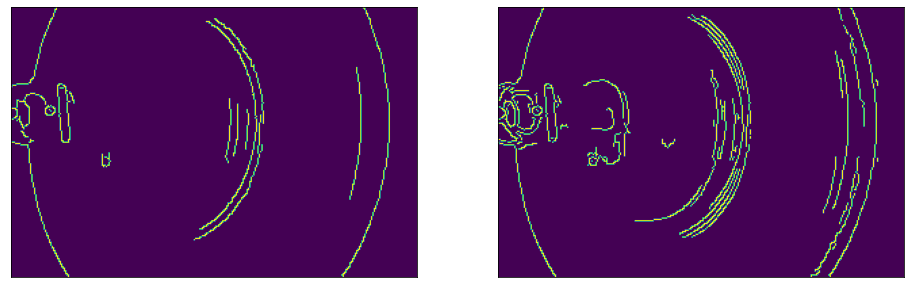

In [ ]:
plot_in_pair(cropped_training_edges, automatic_brightness_and_contrast_data_edge)

<h2>Most egy olyat próbáljunk, ahol van auto contrast and brightness, és van opening is:<h2>

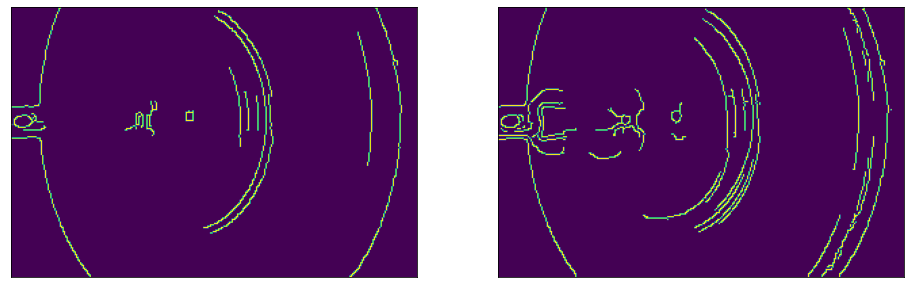

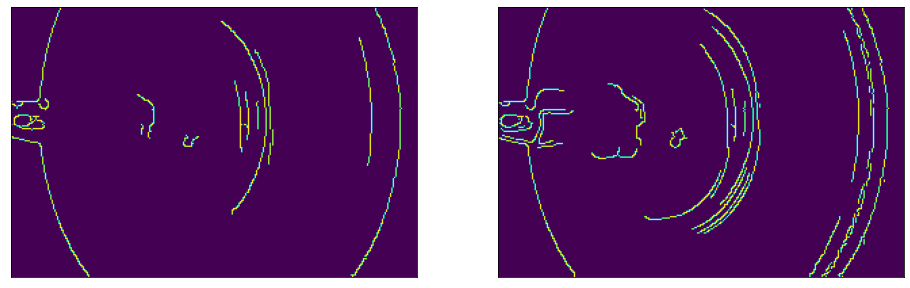

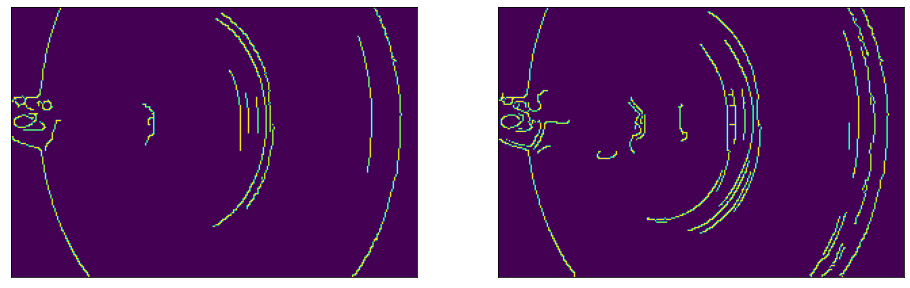

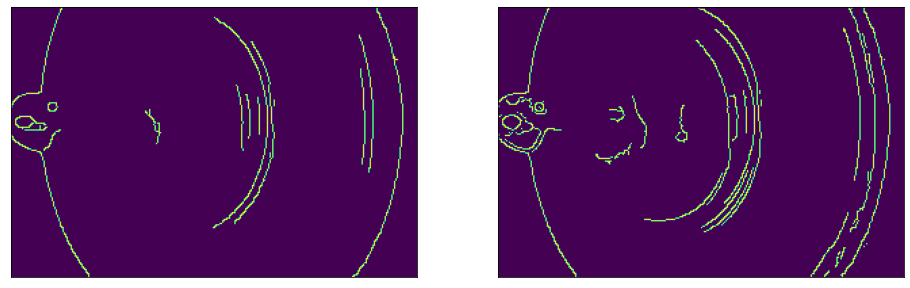

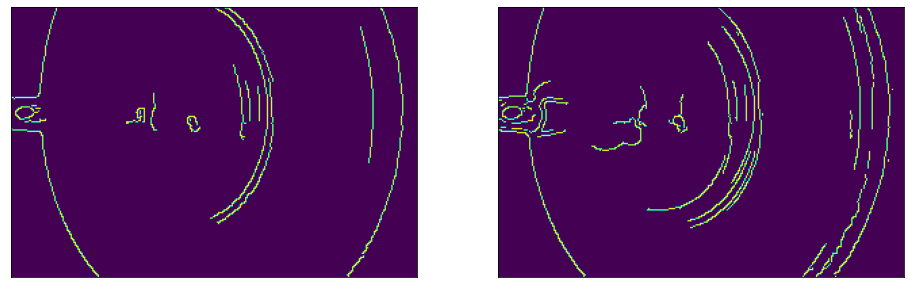

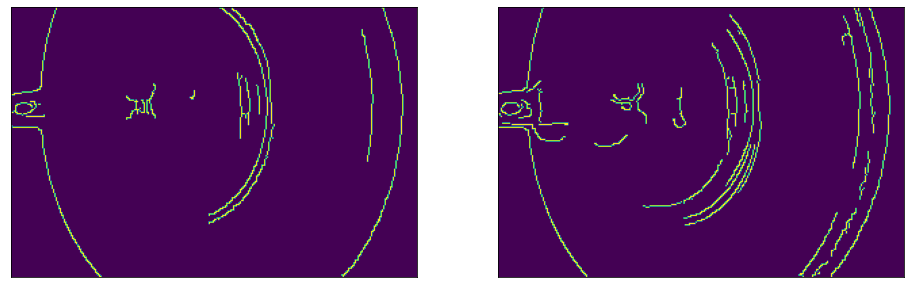

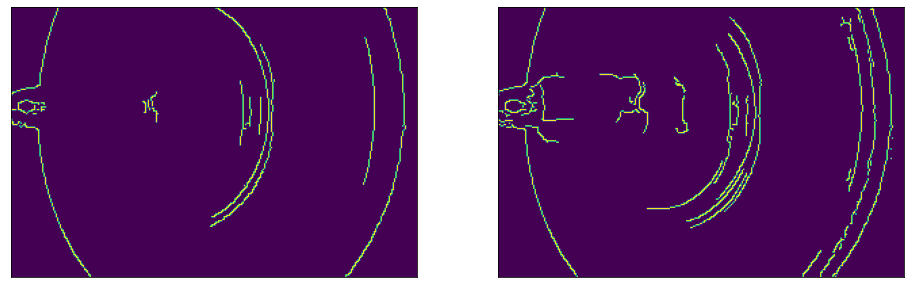

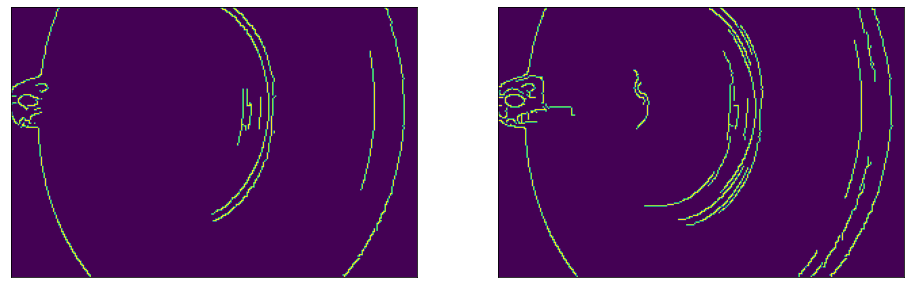

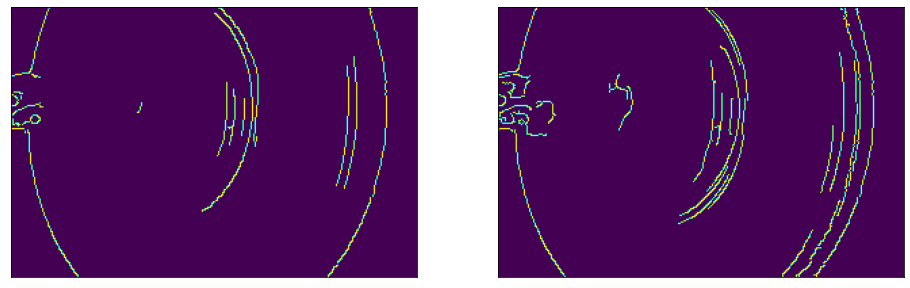

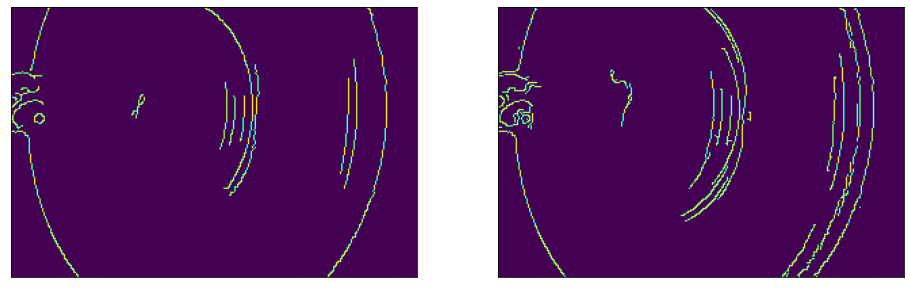

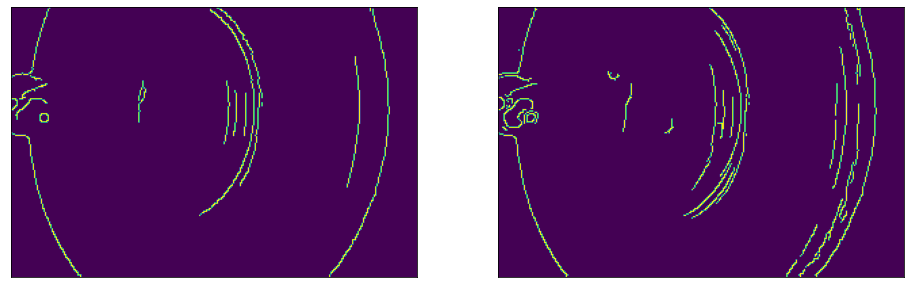

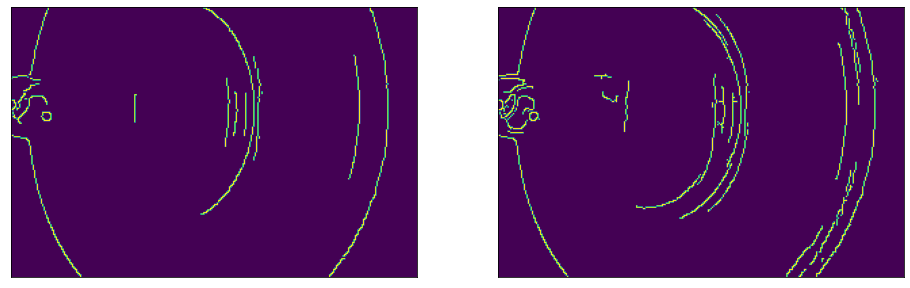

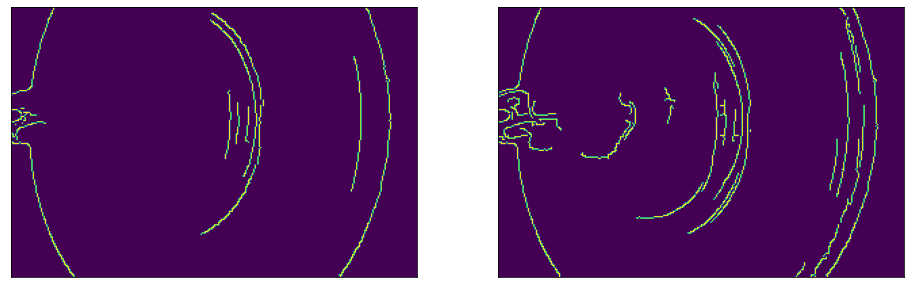

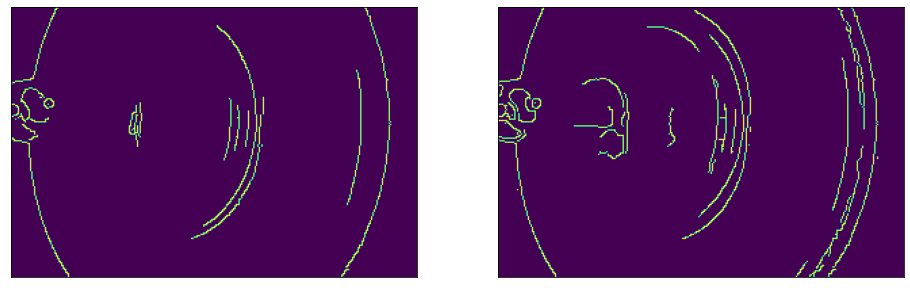

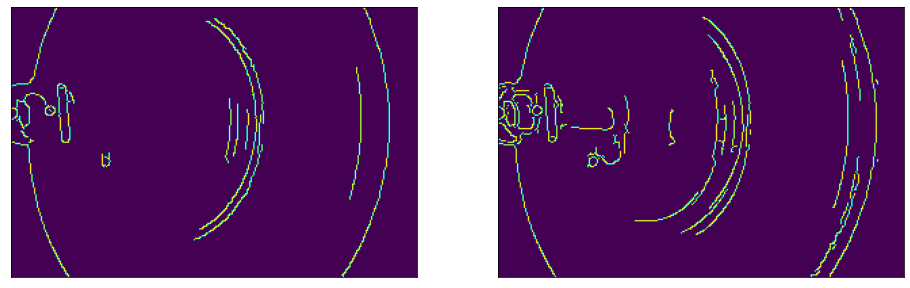

In [ ]:
contrasted_data = apply_auto_brightness_and_contrast(cropped_training_data, 25)
opened_and_contrasted_data = apply_opening(contrasted_data)
edges = apply_edge_detection(opened_and_contrasted_data)
plot_in_pair(cropped_training_edges,edges)

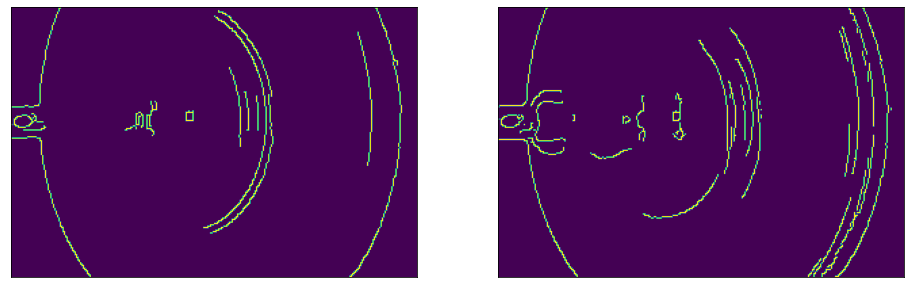

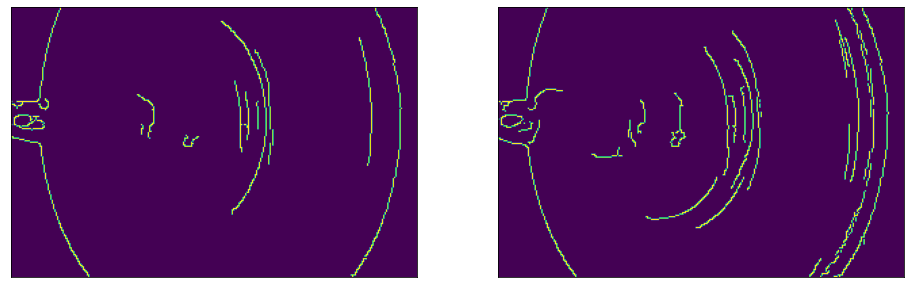

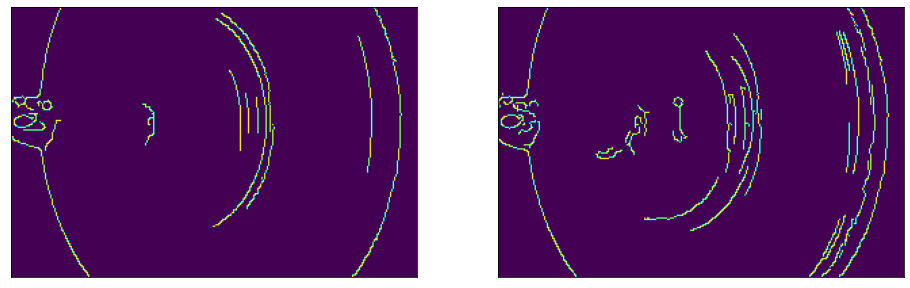

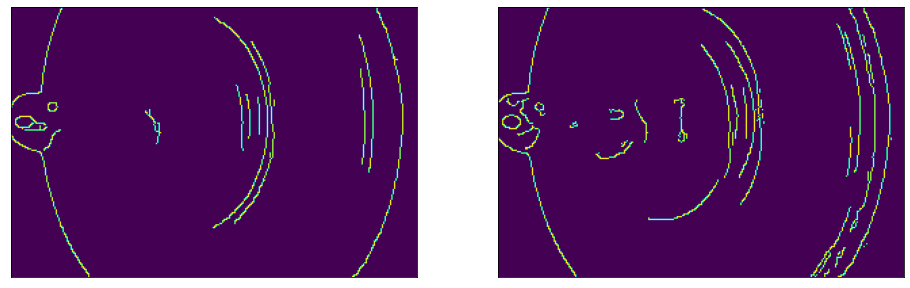

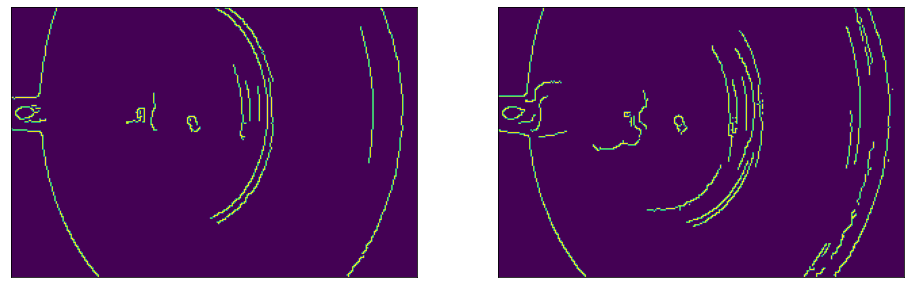

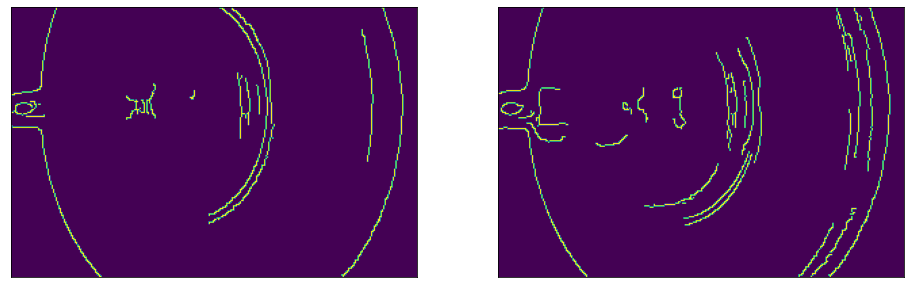

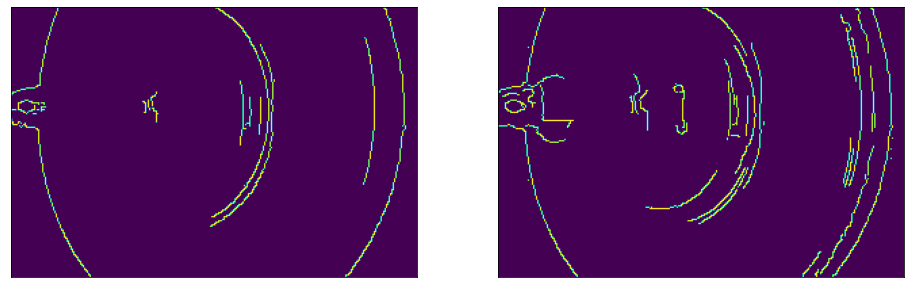

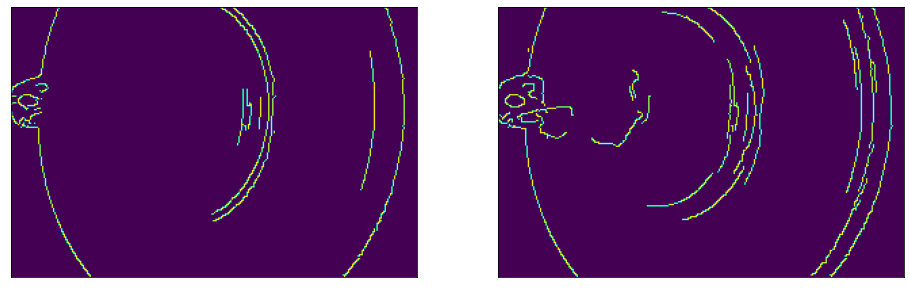

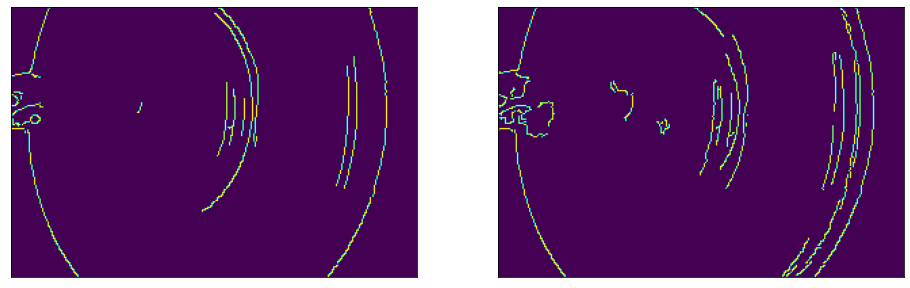

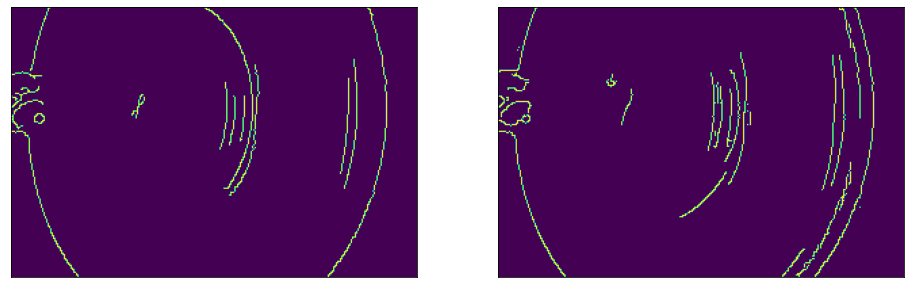

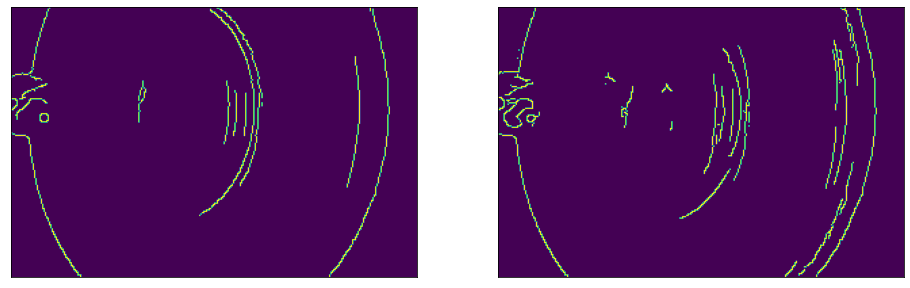

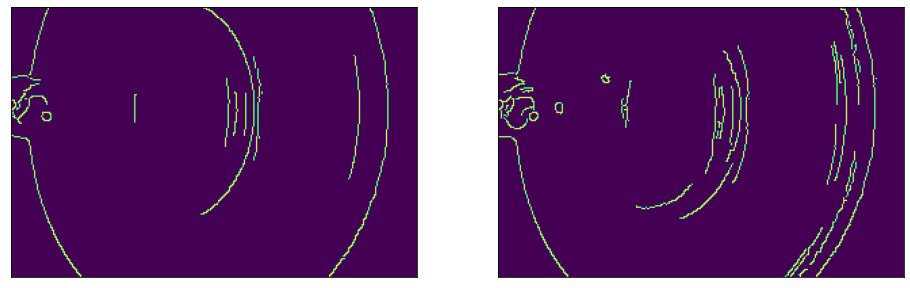

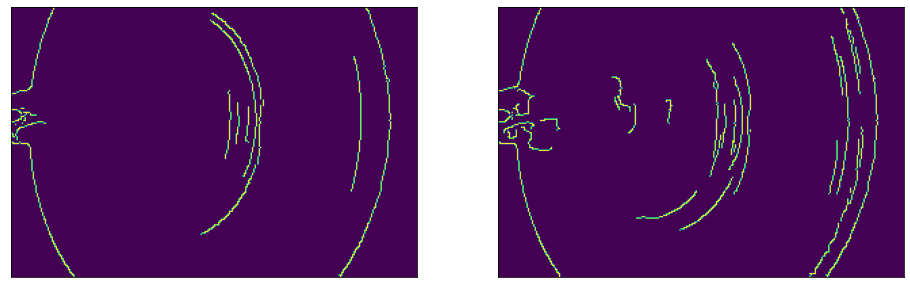

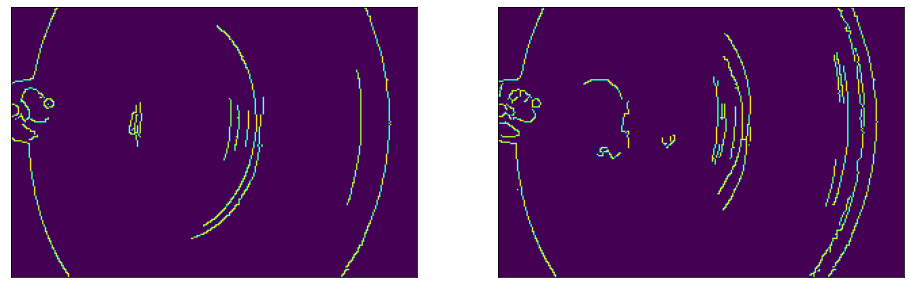

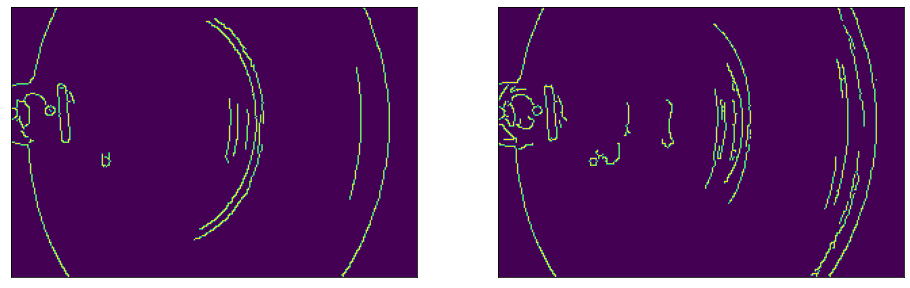

In [ ]:
contrasted_data = apply_auto_brightness_and_contrast(cropped_training_data, 25)
opened_and_contrasted_data = apply_closing(contrasted_data)
edges = apply_edge_detection(opened_and_contrasted_data)
plot_in_pair(cropped_training_edges,edges)

In [ ]:
def new_edge_detection(img):
  #define the vertical filter
  vertical_filter = [[-1,-2,-1], [0,0,0], [1,2,1]]
  # vertical_filter = [[-2,-3,-2], [1,1,1], [2,3,2]]

  #define the horizontal filter
  horizontal_filter = [[-1,0,1], [-2,0,2], [-1,0,1]]
  # horizontal_filter = [[-2,1,2], [-3,1,3], [-2,1,2]]

  #get the dimensions of the image
  n,m,d = img.shape

  #initialize the edges image
  edges_img = img.copy()

  #loop over all pixels in the image
  for row in range(3, n-2):
      for col in range(3, m-2):
          
          #create little local 3x3 box
          local_pixels = img[row-1:row+2, col-1:col+2, 0]
          
          #apply the vertical filter
          vertical_transformed_pixels = vertical_filter*local_pixels
          #remap the vertical score
          vertical_score = vertical_transformed_pixels.sum()/4
          
          #apply the horizontal filter
          horizontal_transformed_pixels = horizontal_filter*local_pixels
          #remap the horizontal score
          horizontal_score = horizontal_transformed_pixels.sum()/4
          
          #combine the horizontal and vertical scores into a total edge score
          edge_score = (vertical_score**2 + horizontal_score**2)**.5
          
          #insert this edge score into the edges image
          edges_img[row, col] = [edge_score]*3

  #remap the values in the 0-1 range in case they went out of bounds
  return edges_img/edges_img.max()

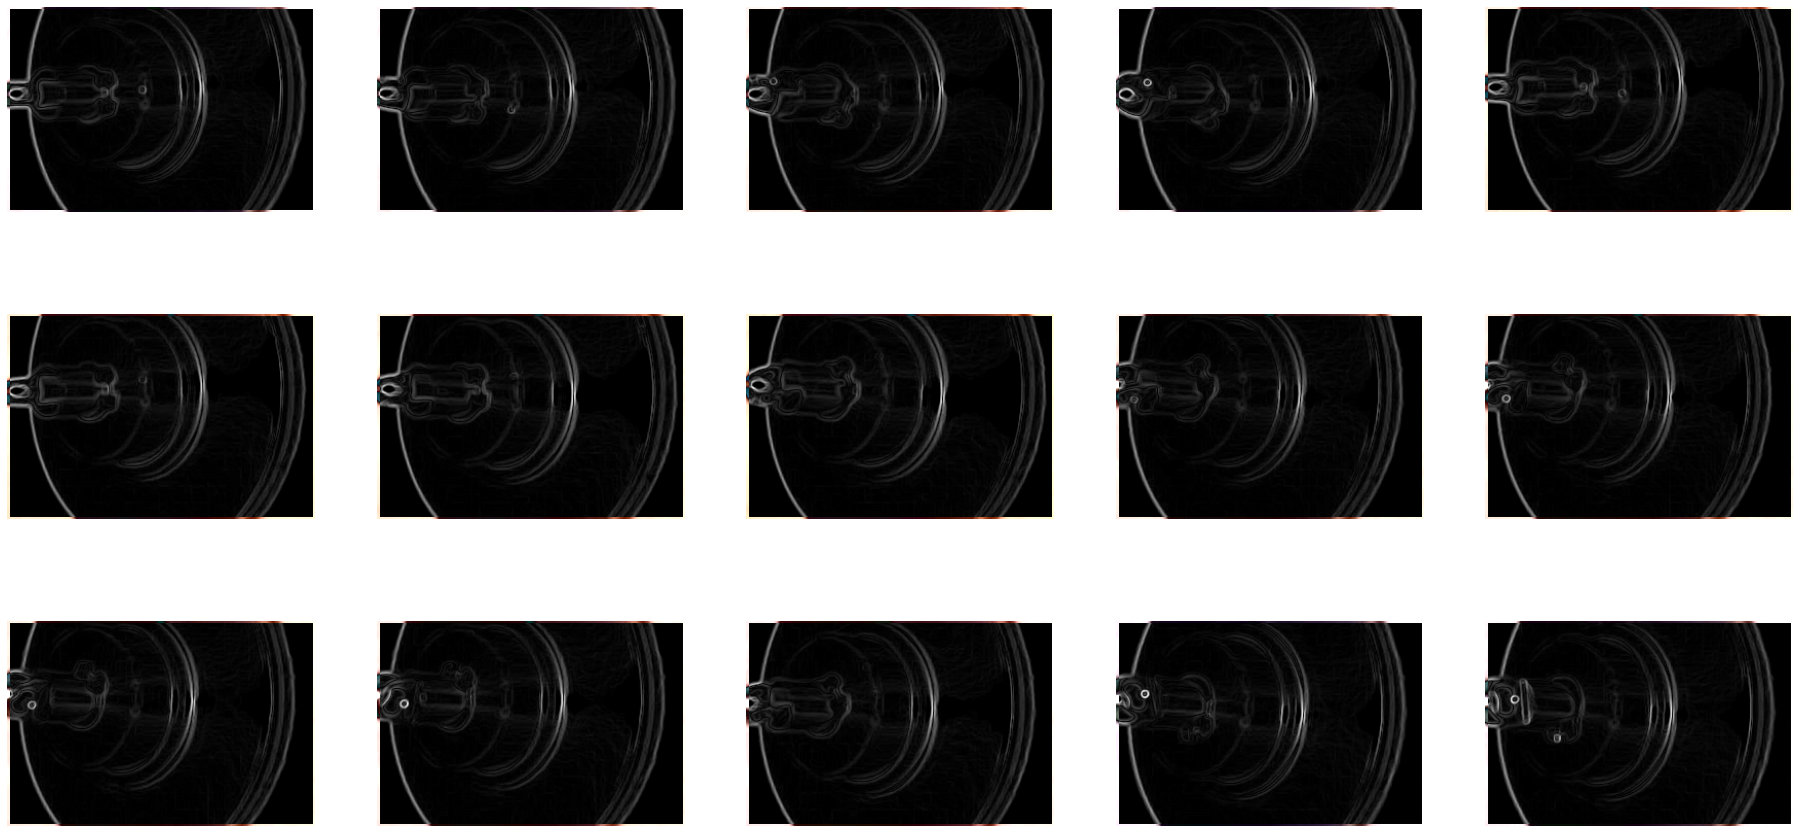

In [ ]:
contrasted_data = apply_auto_brightness_and_contrast(cropped_training_data, 25)
blured_data = apply_gaussian(contrasted_data)
new_edges = [ new_edge_detection(img) for img in contrasted_data]
plot_images(new_edges)

<h2>tovább croppolom hogy csak a gyűrű végeg látszódjanak<h2>

In [ ]:
new_crop = crop_images(cropped_training_data,30,130,40,140)

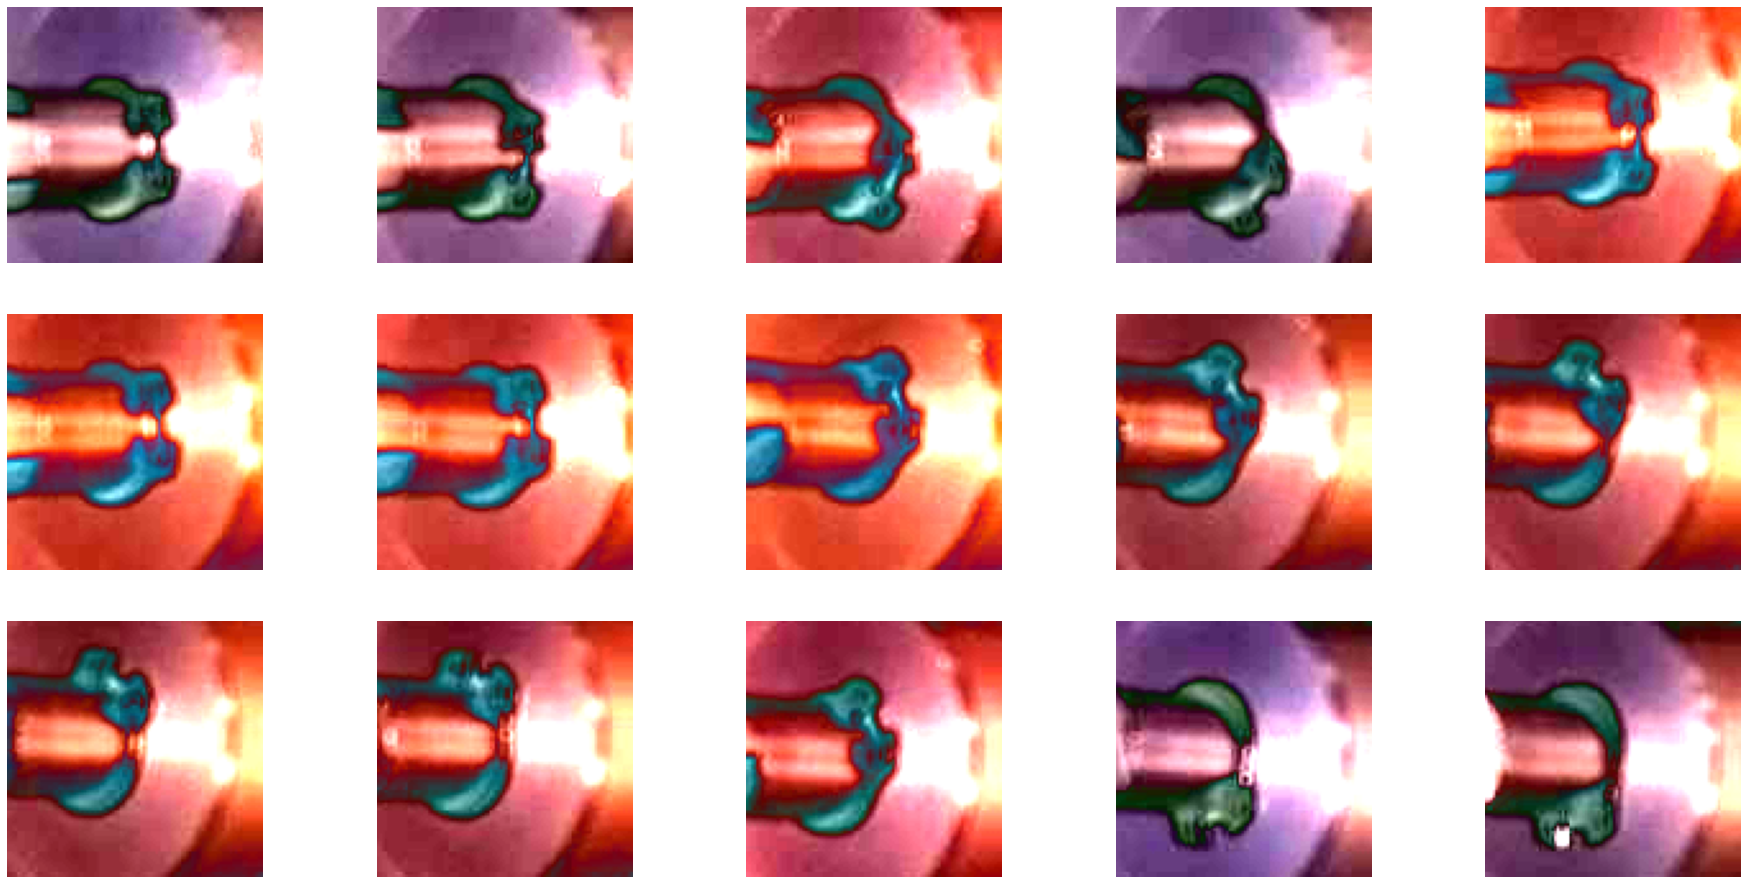

In [ ]:
plot_images(apply_auto_brightness_and_contrast(new_crop, 25))

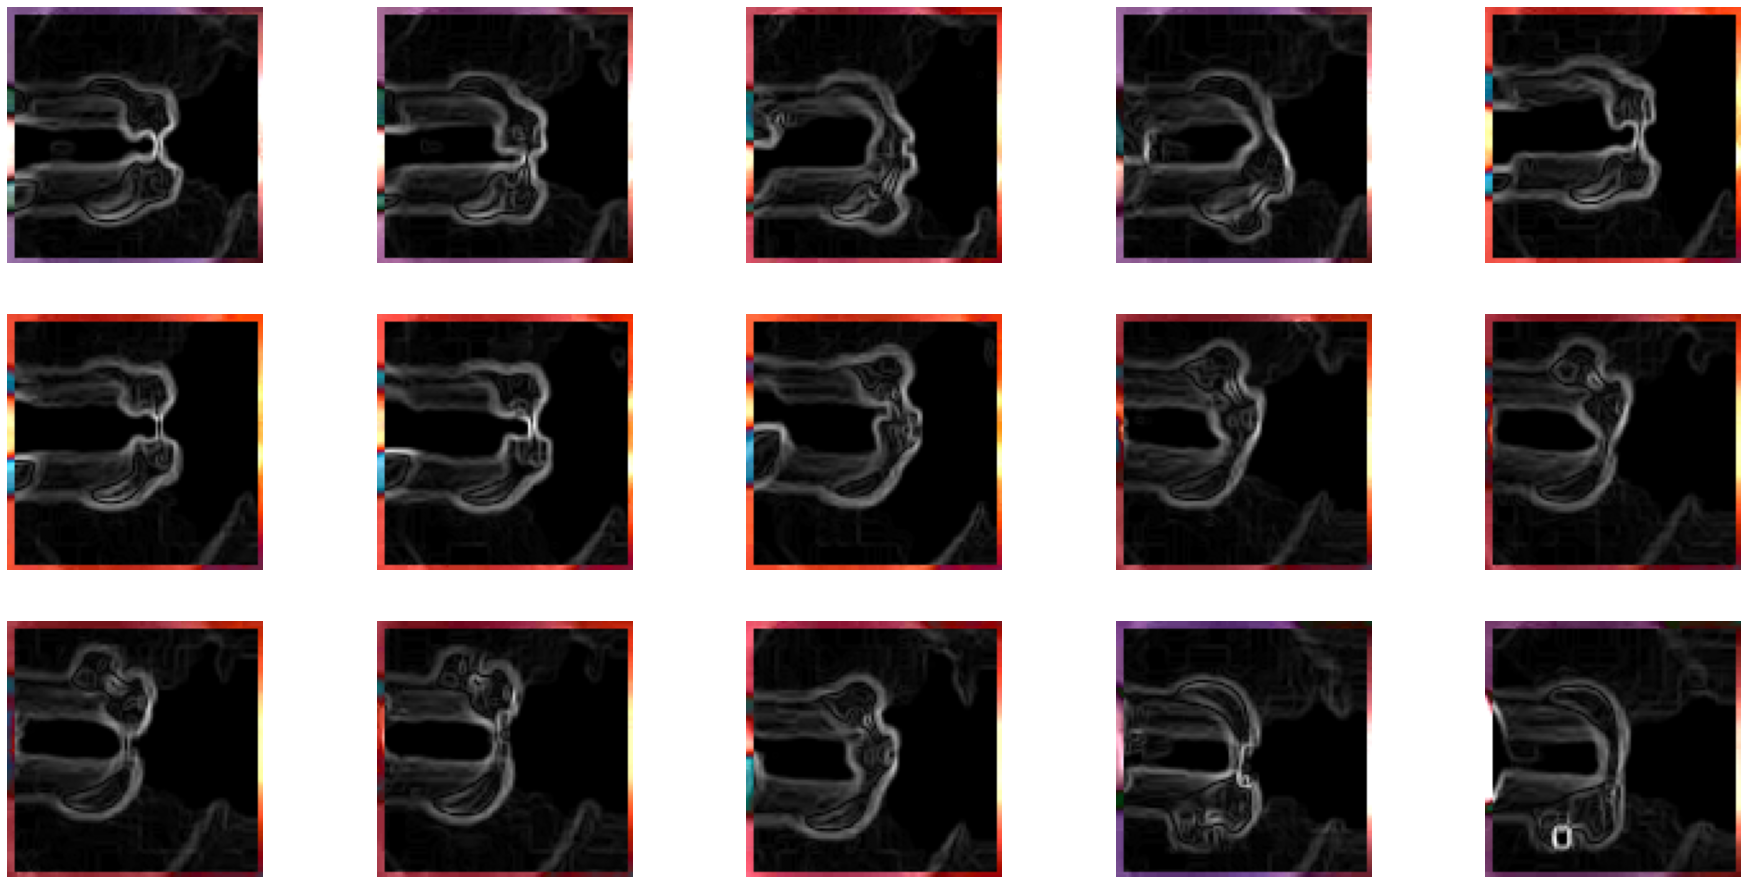

In [ ]:
new_cropped_contrasted = apply_auto_brightness_and_contrast(new_crop, 25)
new_cropped_edges = [ new_edge_detection(img) for img in new_cropped_contrasted]
# opened_new_cropped_edges = apply_opening(new_cropped_edges)
plot_images(new_cropped_edges)

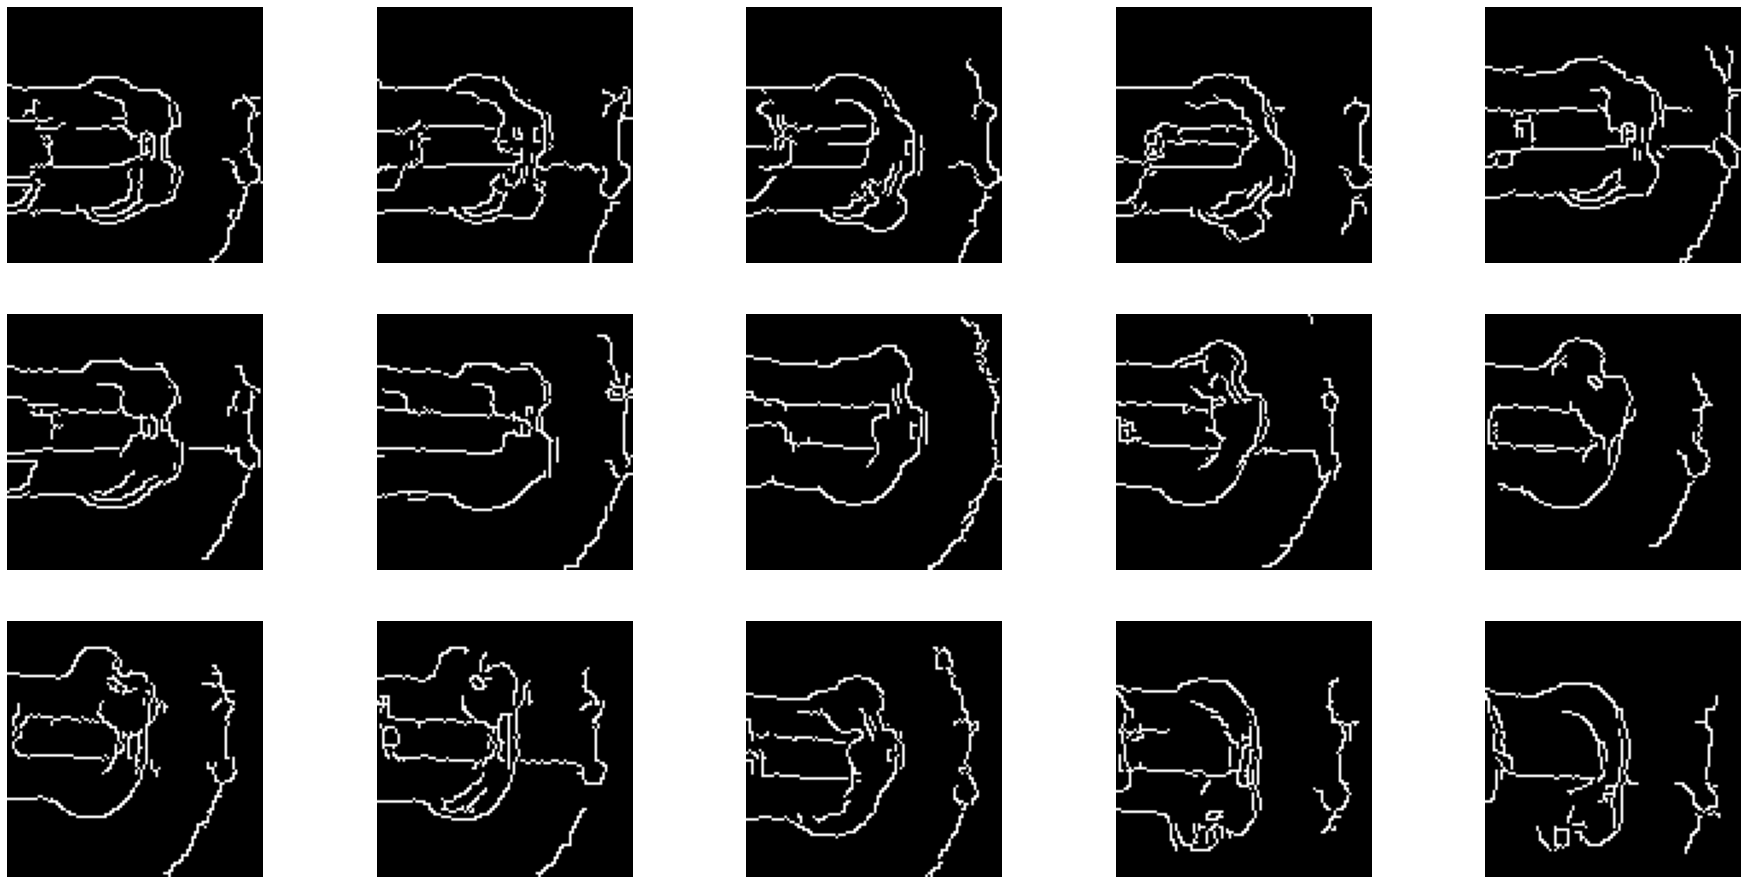

In [ ]:
new_cropped_contrasted = apply_auto_brightness_and_contrast(new_crop, 10)
new_cropped_canny = apply_edge_detection(new_cropped_contrasted)
plot_images(new_cropped_canny)

<h2>Olvassuk be a rossz adathalmazt<h2>

In [ ]:
incorrect_path = '/content/drive/MyDrive/incorrect'
correct_path = '/content/drive/MyDrive/correct'

In [ ]:
def make_data_from_folder(path):
  data = []
  for img in os.listdir(path):
      pic = cv2.imread(os.path.join(path,img))
      pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
      # pic = cv2.resize(pic,(80,80))
      data.append(pic)
  return data

In [ ]:
correct_data = make_data_from_folder(correct_path)
incorrect_data = make_data_from_folder(incorrect_path)

In [ ]:
f"{len(correct_data)} kép van a correct halmazban, és {len(incorrect_data)} az incorrect-ben."

'15 kép van a correct halmazban, és 15 az incorrect-ben.'

In [ ]:
#plot_in_pair(correct_data, incorrect_data)

<h2>Szükség lesz augmentálásra, mert egyrészt a 15 incorrect kép ugyanolyan, másrészt kevés a 15-15 kép<h2>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

def augment_images(path):
  for img in os.listdir(path):
    # Initialising the ImageDataGenerator class.
    # We will pass in the augmentation parameters in the constructor.
    datagen = ImageDataGenerator(
            rotation_range = 40,
            shear_range = 0.2,
            zoom_range = 0.2,
            horizontal_flip = True,
            brightness_range = (0.5, 1.5))
        
    # Loading a sample image 
    img = load_img(os.path.join(path,img)) 
    # Converting the input sample image to an array
    x = img_to_array(img)
    # Reshaping the input image
    x = x.reshape((1, ) + x.shape) 
      
    # Generating and saving 5 augmented samples 
    # using the above defined parameters. 
    i = 0
    for batch in datagen.flow(x, batch_size = 1,
                              save_to_dir =path, 
                              save_prefix ='image', save_format ='jpeg'):
        i += 1
        if i > 5:
            break

In [ ]:
augment_images(correct_path)

In [ ]:
augment_images(incorrect_path)

In [ ]:
correct_data = make_data_from_folder(correct_path)
incorrect_data = make_data_from_folder(incorrect_path)

In [ ]:
f"{len(correct_data)} kép van a correct halmazban, és {len(incorrect_data)} az incorrect-ben."

'104 kép van a correct halmazban, és 105 az incorrect-ben.'

Contrasztot és fényerőt állítsuk be:

In [ ]:
contrasted_correct = apply_auto_brightness_and_contrast(correct_data, 25)
contrasted_incorrect = apply_auto_brightness_and_contrast(incorrect_data, 25)

In [ ]:
#plot_in_pair(contrasted_correct, correct_data)

vágjuk le őket:

In [ ]:
cropped_correct = crop_images(contrasted_correct, 200, 400, 300, 600)
cropped_incorrect = crop_images(contrasted_incorrect, 200, 400, 300, 600)

In [ ]:
correct_edges = apply_edge_detection(cropped_correct)
incorrect_edges = apply_edge_detection(cropped_incorrect)

In [ ]:
#plot_images(correct_edges)

In [ ]:
#plot_images(incorrect_edges)

halmazok szétosztása, és címke tömbök:

In [ ]:
y_correct = np.zeros((len(correct_data),), dtype=int)
y_incorrect = np.ones((len(incorrect_data),), dtype=int)
y = np.concatenate((y_correct, y_incorrect))
#y

reshapeljük az adatokat, mert a modelleknek <=2 dimenziósnak kell hogy legyenek:

In [ ]:
def apply_reshape(images):
  return [img.flatten() for img in images]

In [ ]:
reshaped_correct_edges = apply_reshape(correct_edges)
reshaped_incorrect_edges = apply_reshape(incorrect_edges)

In [ ]:
X = np.concatenate((reshaped_correct_edges,reshaped_incorrect_edges))
# X.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Osztályozó modell létrehozása:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4)

In [ ]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score( y_test, y_pred)

0.6376811594202898

csináljunk egy függvényt ami végig próbálja a paramétereket:

In [ ]:
def param_finder_knn(neighbours, X, y, algos):
  scores = [] 
  max_score = 0
  max_n = 0
  max_algo = ""

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

  if type(neighbours) != int:
    for n in neighbours:
      model = KNeighborsClassifier(n_neighbors=n, algorithm=algos)
      model.fit(X_train,y_train)
      y_pred = model.predict(X_test)
      new_score = accuracy_score( y_test, y_pred)
      scores.append(new_score)
      if new_score > max_score:
        max_n = n
        max_score = new_score

    return scores, max_n
  else:
    for a in algos:
      model = KNeighborsClassifier(n_neighbors=neighbours, algorithm=a)
      model.fit(X_train,y_train)
      y_pred = model.predict(X_test)
      new_score = accuracy_score( y_test, y_pred)
      scores.append(new_score)
      if new_score > max_score:
        max_algo = a
        max_score = new_score

    return scores, max_algo
  

In [ ]:
neighbours = [1,2,3,4,5,6,7,8,9,10]
scores, max_n = param_finder_knn(neighbours, X, y, "auto")

Pontosság változása a neighbour függvényében:

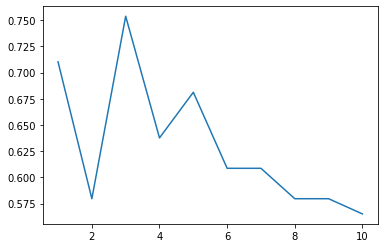

In [ ]:
plt.plot(neighbours, scores)

Jó ha van egy függvény a cross validációra is:

In [ ]:
def cross_val_knn(X, y, n, algo):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

  model = KNeighborsClassifier(n_neighbors=n, algorithm=algo)
  model.fit(X_train,y_train)

  from sklearn.model_selection import cross_val_score
  return cross_val_score(model, X, y, cv=5)

In [ ]:
cross_val_knn(X, y, max_n, "auto")

array([0.54761905, 0.64285714, 0.64285714, 0.64285714, 0.73170732])

Most próbáljuk végig az algoritmusokat is hasonlóképpen:

In [ ]:
algos = ["auto", "ball_tree", "kd_tree", "brute"]

scores, max_algo = param_finder_knn(max_n, X, y, algos)

In [ ]:
cross_val_knn(X, y, max_n, max_algo)

array([0.54761905, 0.64285714, 0.64285714, 0.64285714, 0.73170732])

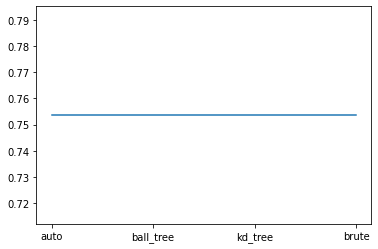

In [ ]:
plt.plot(algos, scores)

Valamiért az összesnél ugyanazt az eredményt kapjuk.